In [73]:
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.linear_model import LinearRegression

# Set the seed for reproducibility
np.random.seed(42)

In [74]:
from scipy.stats import f

In [75]:
!pip show plotnine

Name: plotnine
Version: 0.15.0
Summary: A Grammar of Graphics for Python
Home-page: https://plotnine.readthedocs.io/en/stable
Author: 
Author-email: Hassan Kibirige <has2k1@gmail.com>
License: The MIT License (MIT)

Copyright (c) 2022 Hassan Kibirige

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND N

In [76]:
def generate_data(beta0, beta1, sigma, n):
    X = np.linspace(start=1, stop=n, num=n).reshape(-1, 1) #array w/ 1 column, the -1 means 'infer the # of rows'

    # Define parameters
    #beta0 = 4
    #beta1 = 3
    
    # Generate epsilon as a 1D array of N(0, sigma^2) RVs
    epsilon = sigma * np.random.randn(n)
    
    # Generate y using SLR model
    y = beta0 + beta1 * X.flatten() + epsilon

    return X, y 

In [77]:
X, y = generate_data(beta0 = 4, beta1 = 3, sigma =2, n = 100)

In [78]:
X

array([[  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.],
       [ 11.],
       [ 12.],
       [ 13.],
       [ 14.],
       [ 15.],
       [ 16.],
       [ 17.],
       [ 18.],
       [ 19.],
       [ 20.],
       [ 21.],
       [ 22.],
       [ 23.],
       [ 24.],
       [ 25.],
       [ 26.],
       [ 27.],
       [ 28.],
       [ 29.],
       [ 30.],
       [ 31.],
       [ 32.],
       [ 33.],
       [ 34.],
       [ 35.],
       [ 36.],
       [ 37.],
       [ 38.],
       [ 39.],
       [ 40.],
       [ 41.],
       [ 42.],
       [ 43.],
       [ 44.],
       [ 45.],
       [ 46.],
       [ 47.],
       [ 48.],
       [ 49.],
       [ 50.],
       [ 51.],
       [ 52.],
       [ 53.],
       [ 54.],
       [ 55.],
       [ 56.],
       [ 57.],
       [ 58.],
       [ 59.],
       [ 60.],
       [ 61.],
       [ 62.],
       [ 63.],
       [ 64.],
       [ 65.],
       [ 66.],
       [ 6

In [79]:
y

array([  7.99342831,   9.7234714 ,  14.29537708,  19.04605971,
        18.53169325,  21.53172609,  28.15842563,  29.53486946,
        30.06105123,  35.08512009,  36.07316461,  39.06854049,
        43.48392454,  42.17343951,  45.55016433,  50.87542494,
        52.97433776,  58.62849467,  59.18395185,  61.1753926 ,
        69.93129754,  69.5484474 ,  73.13505641,  73.15050363,
        77.91123455,  82.22184518,  82.69801285,  88.75139604,
        89.79872262,  93.4166125 ,  95.79658678, 103.70455637,
       102.97300555, 103.88457814, 110.64508982, 109.5583127 ,
       115.41772719, 114.08065975, 118.3436279 , 124.39372247,
       128.47693316, 130.34273656, 132.76870344, 135.39779261,
       136.04295602, 140.56031158, 144.07872246, 150.11424445,
       151.68723658, 150.47391969, 157.64816794, 159.22983544,
       161.646156  , 167.22335258, 171.06199904, 173.86256024,
       173.32156495, 177.38157525, 181.66252686, 185.95109025,
       186.04165152, 189.62868205, 190.78733005, 193.60

In [80]:
def ss_decomp(X, y):

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate the mean of y
    y_mean = np.mean(y)
    n = len(y)

    #calculate SS quantities
    SST = np.sum((y - y_mean) ** 2).round(4)
    SSR = np.sum((y_pred - y_mean) ** 2).round(4)
    SSE = np.sum((y - y_pred) ** 2).round(4)


    Fstat = (SSR/1) / (SSE/(n-2))

    # Output the sum of squares decomposition
    print(f"SST (Total Sum of Squares): {SST}")
    print(f"SSR (Regression Sum of Squares): {SSR}")
    print(f"SSE (Error Sum of Squares): {SSE}")
    print(f"SST = SSR + SSE: {np.isclose(SST, SSR + SSE)}")
    
    print(f"Coefficient of Determination, R^2 is: {np.round(1-SSE/SST, 4)}")

    print(f"The F-test will reject the null hypothesis? {Fstat > f.ppf(0.95, dfn=1, dfd=n-2)}")

    
    #make a ggplot
    df = pd.DataFrame({
        'X': X.flatten(),
        'y': y,
        'predicted': y_pred,
        'y_mean':  y_mean
    })

    gg1 = (
        ggplot(df, aes(x = 'X', y = 'y')) + 
        geom_point() + 
        #geom_smooth(method = "lm", formula = "y ~ x", se = False) +
        geom_hline(yintercept=y_mean, linetype='dashed') + 
        geom_segment(aes(
            xend = 'X', yend = 'y_mean'), color = "black") + #SST components
        ggtitle(f"R^2 is {np.round(1-SSE/SST, 4)}")
        )
    
    gg2 = (
        ggplot(df, aes(x = 'X', y = 'y')) + 
        geom_point() + 
        geom_smooth(method = "lm", formula = "y ~ x", se = False) +
        geom_hline(yintercept=y_mean, linetype='dashed') + 
        geom_segment(aes(
            xend = 'X', y = 'predicted', yend = 'y_mean'), 
            color = "blue", linetype = "dashed") + #SSR components 
        geom_segment(aes(
            xend = 'X',  yend = 'predicted'), 
            color = "red", linetype = "dashed") + #SSE components
        ggtitle(f"R^2 is {np.round(1-SSE/SST, 4)}")
        )

    display(gg1, gg2) #print the plots


    
    
    return Fstat 
    
    #gg1, gg2 #return the gg objects if you want to store the plots into variables

SST (Total Sum of Squares): 759947.4965
SSR (Regression Sum of Squares): 750943.9459
SSE (Error Sum of Squares): 9003.5506
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.9882
The F-test will reject the null hypothesis? True


Matplotlib is building the font cache; this may take a moment.


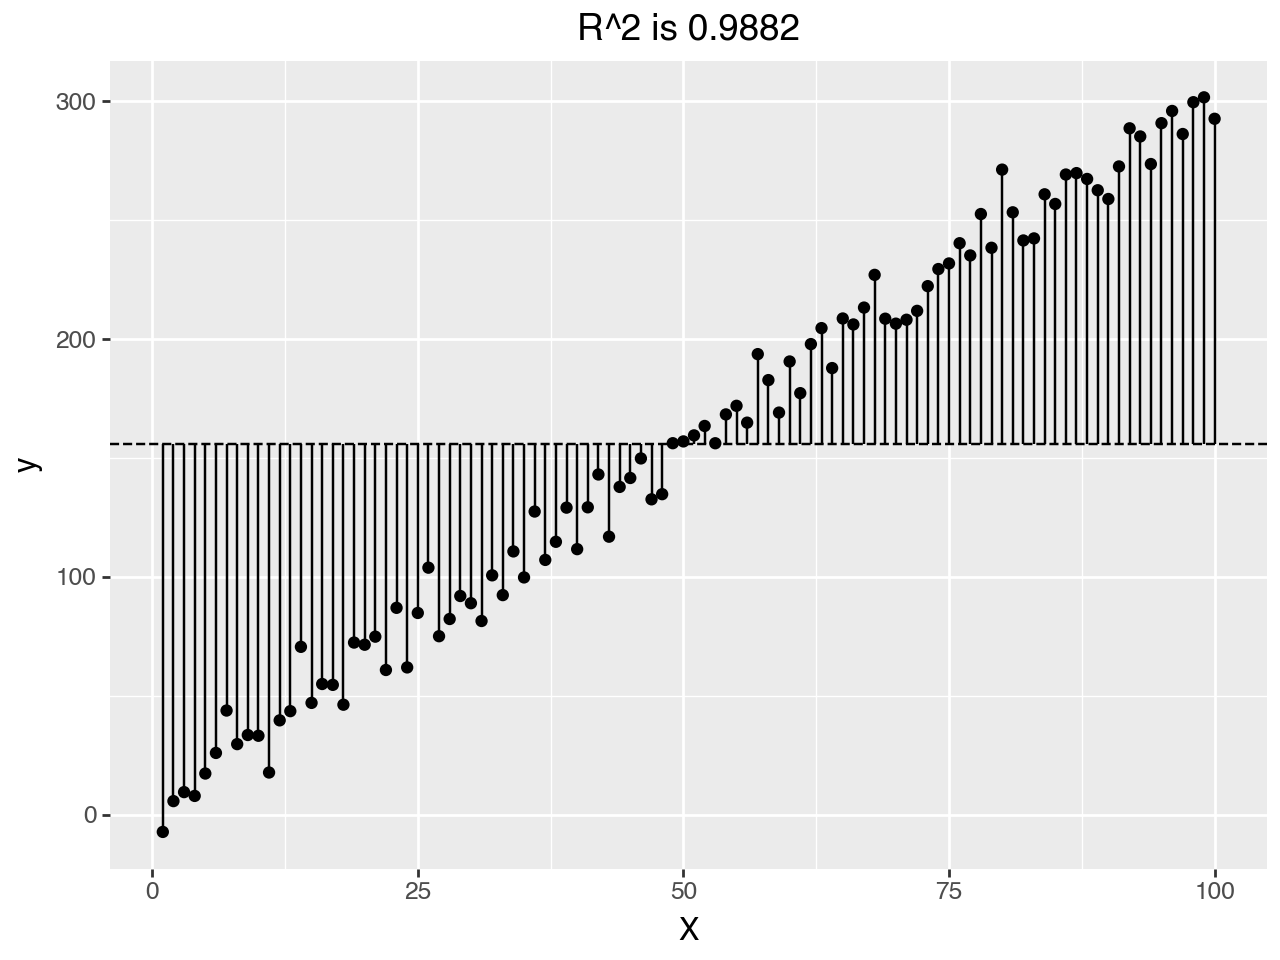

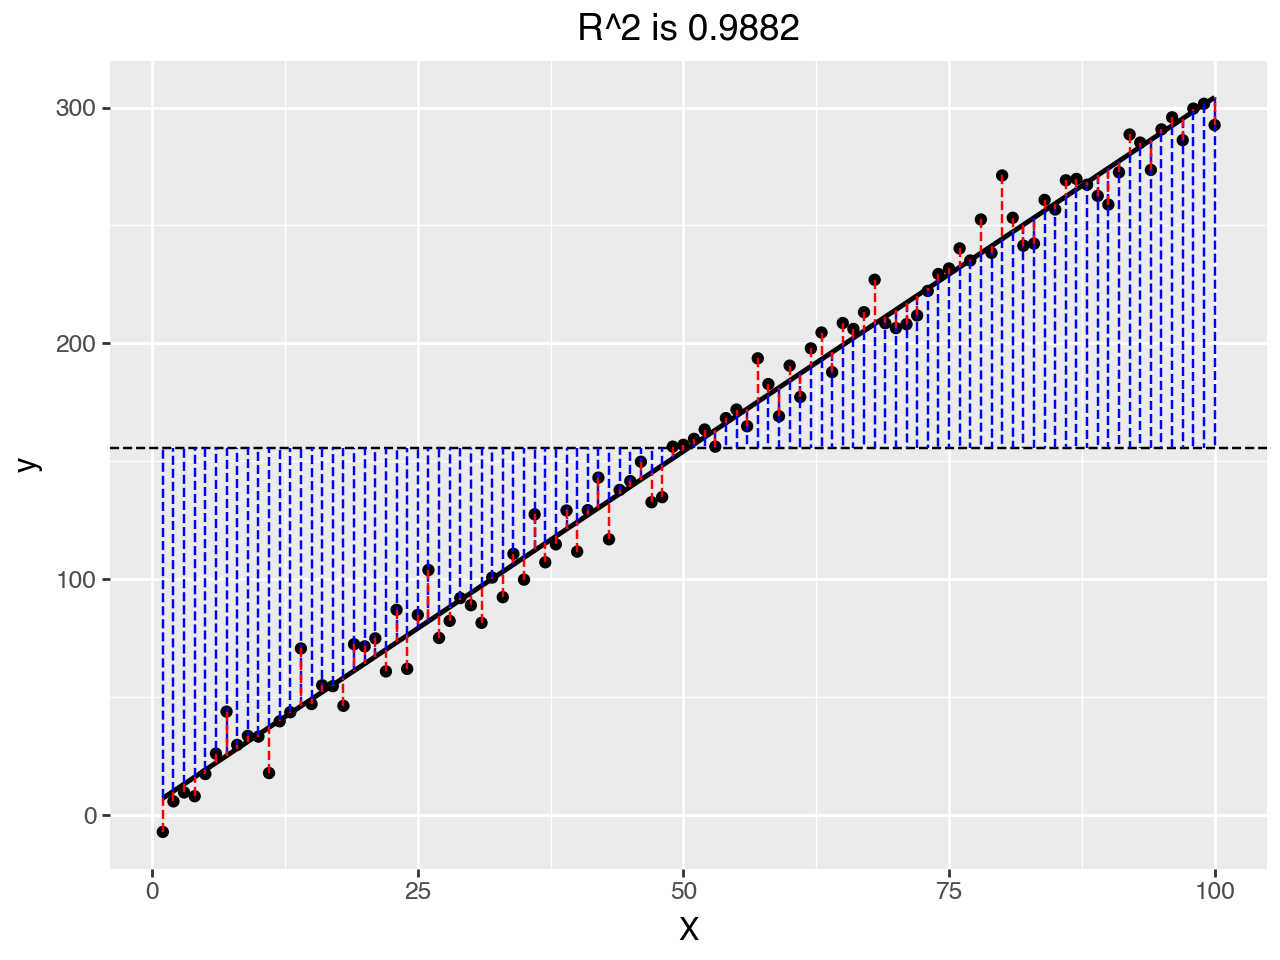

np.float64(8173.720565106837)

In [81]:
X, y = generate_data(beta0 = 4, beta1 = 3, sigma = 10, n = 100)
ss_decomp(X, y)


SST (Total Sum of Squares): 89388.473
SSR (Regression Sum of Squares): 77842.6193
SSE (Error Sum of Squares): 11545.8537
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.8708
The F-test will reject the null hypothesis? True


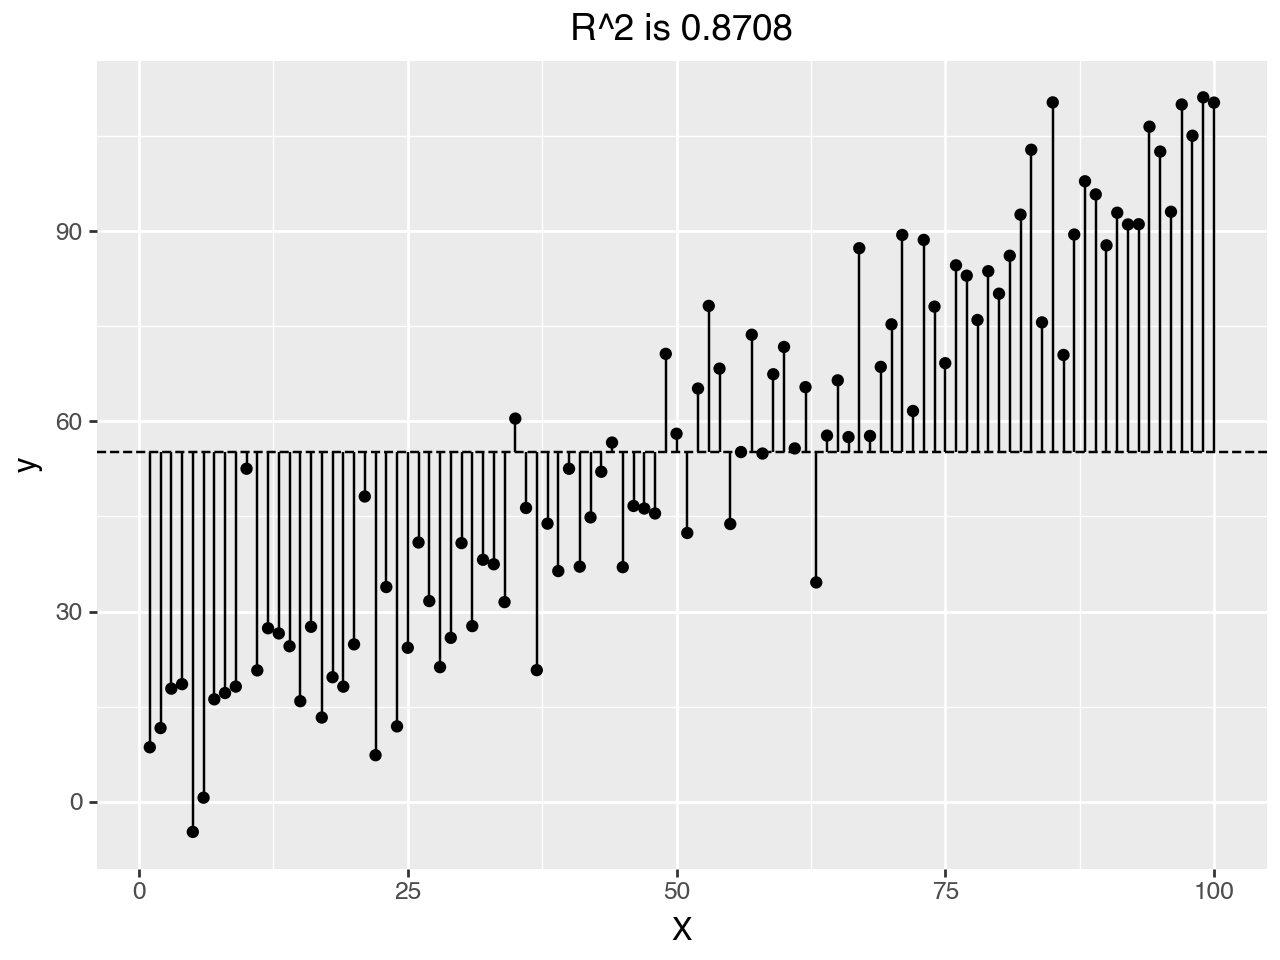

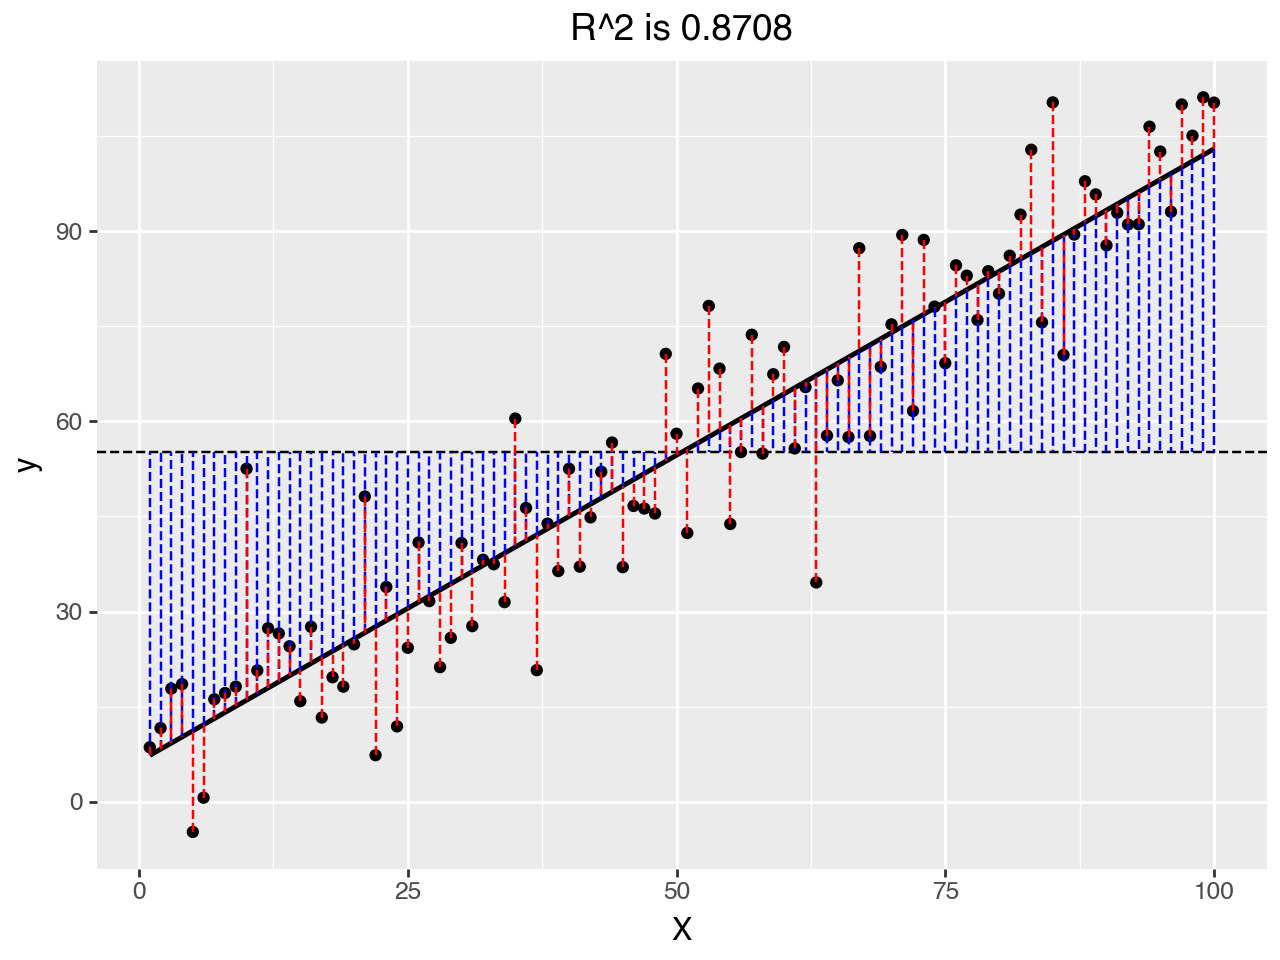

np.float64(660.7200203307618)

In [82]:
X, y = generate_data(beta0 = 4, beta1 = 1, sigma = 10, n = 100)
ss_decomp(X, y)

SST (Total Sum of Squares): 11190.3746
SSR (Regression Sum of Squares): 5.3272
SSE (Error Sum of Squares): 11185.0474
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.0005
The F-test will reject the null hypothesis? False


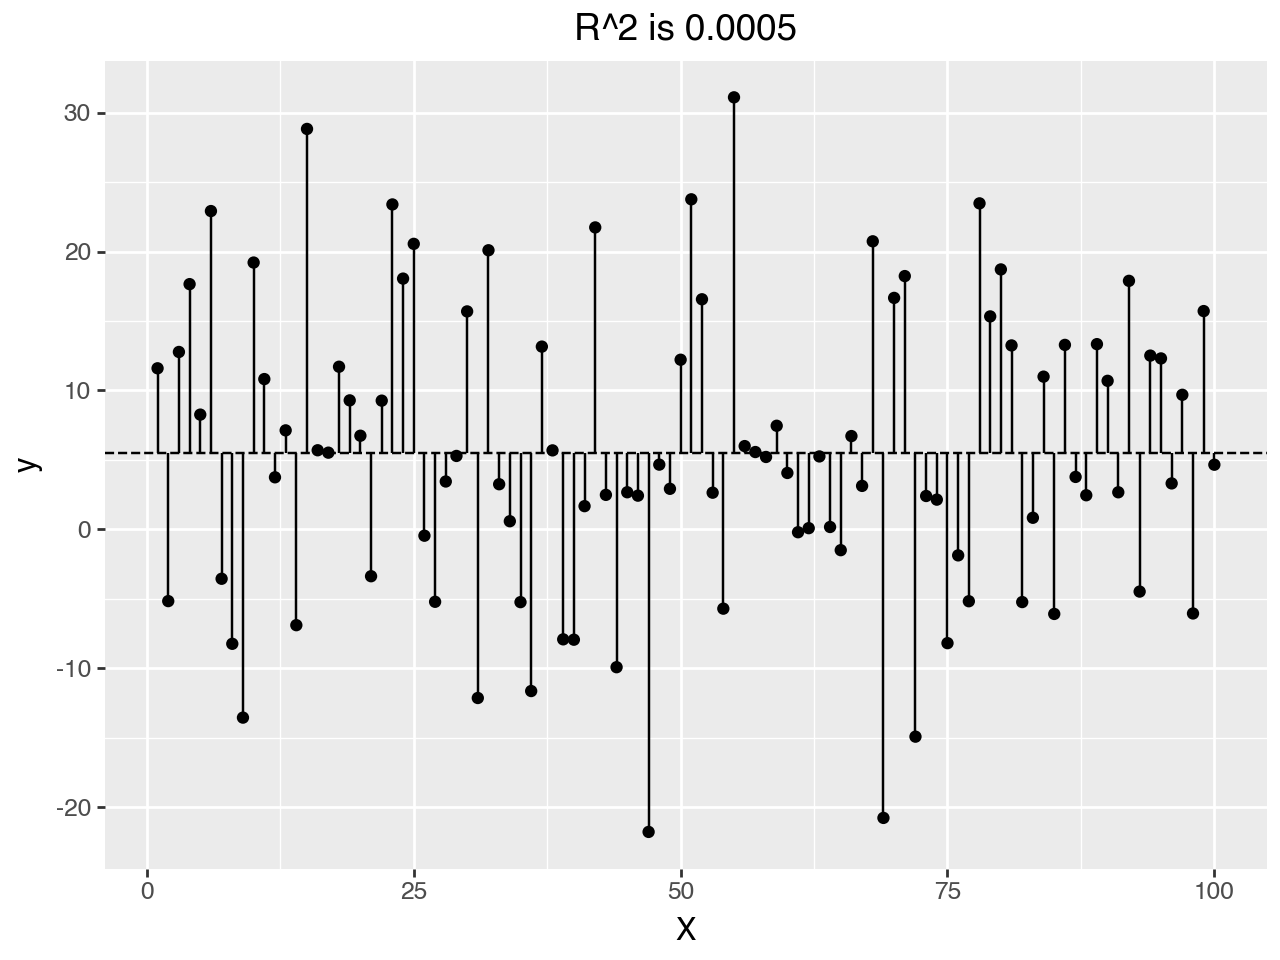

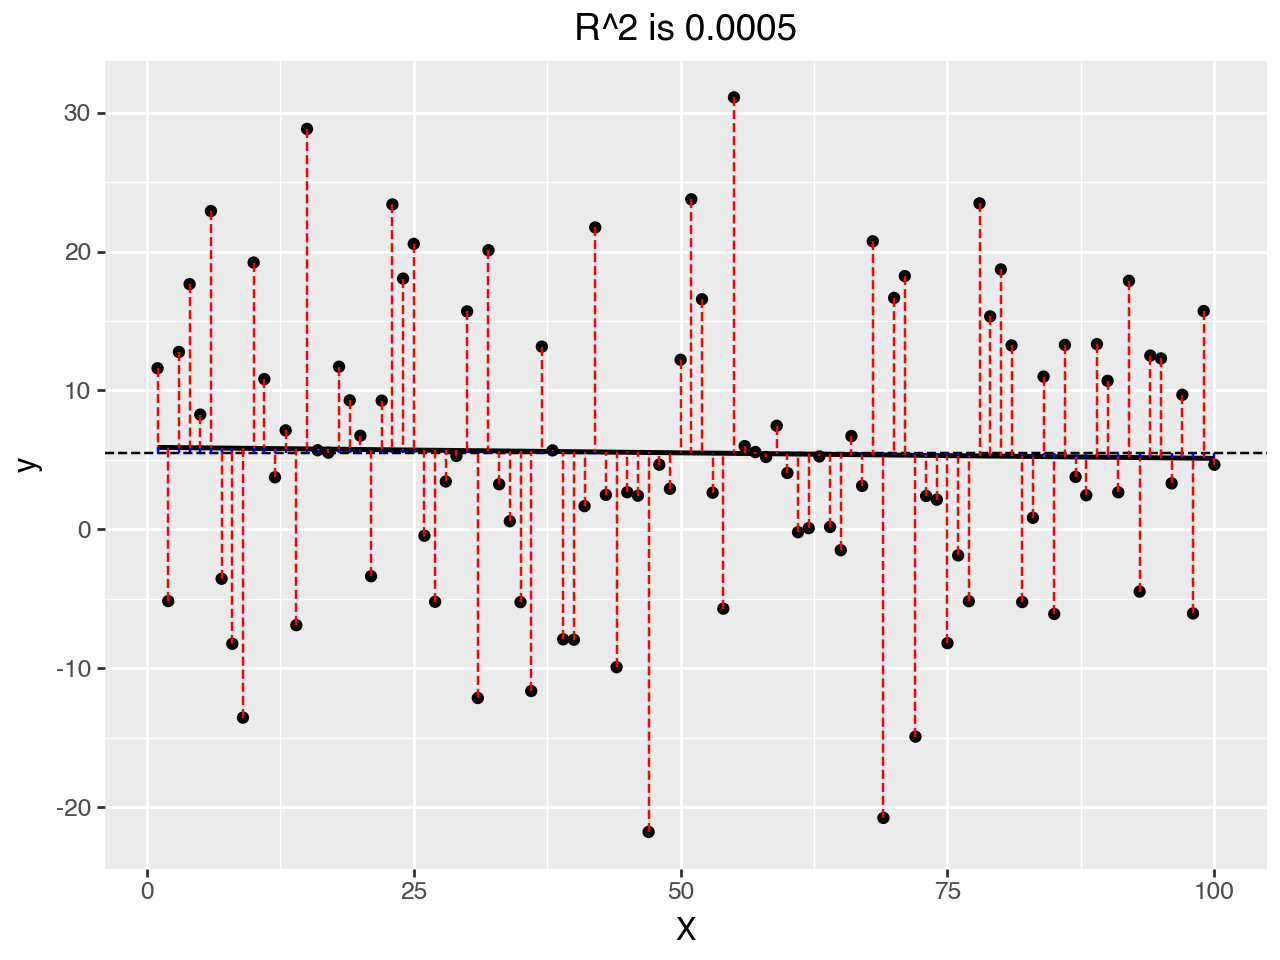

np.float64(0.046675314044712944)

In [86]:
X, y = generate_data(beta0 = 4, beta1 = .025, sigma = 10, n = 100)
ss_decomp(X, y)

SST (Total Sum of Squares): 11192.203
SSR (Regression Sum of Squares): 0.0706
SSE (Error Sum of Squares): 11192.1324
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.0
The F-test will reject the null hypothesis? False


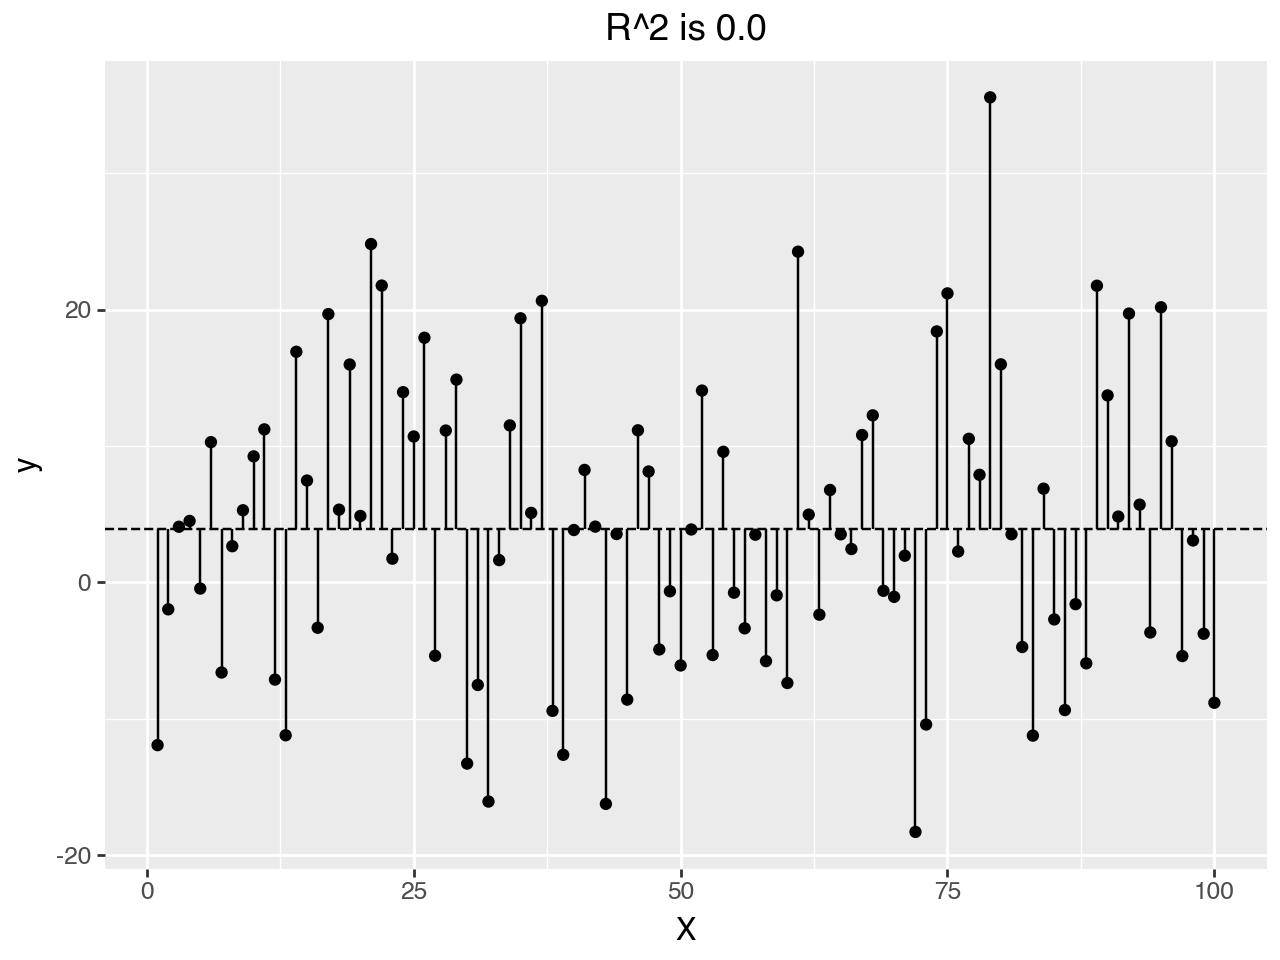

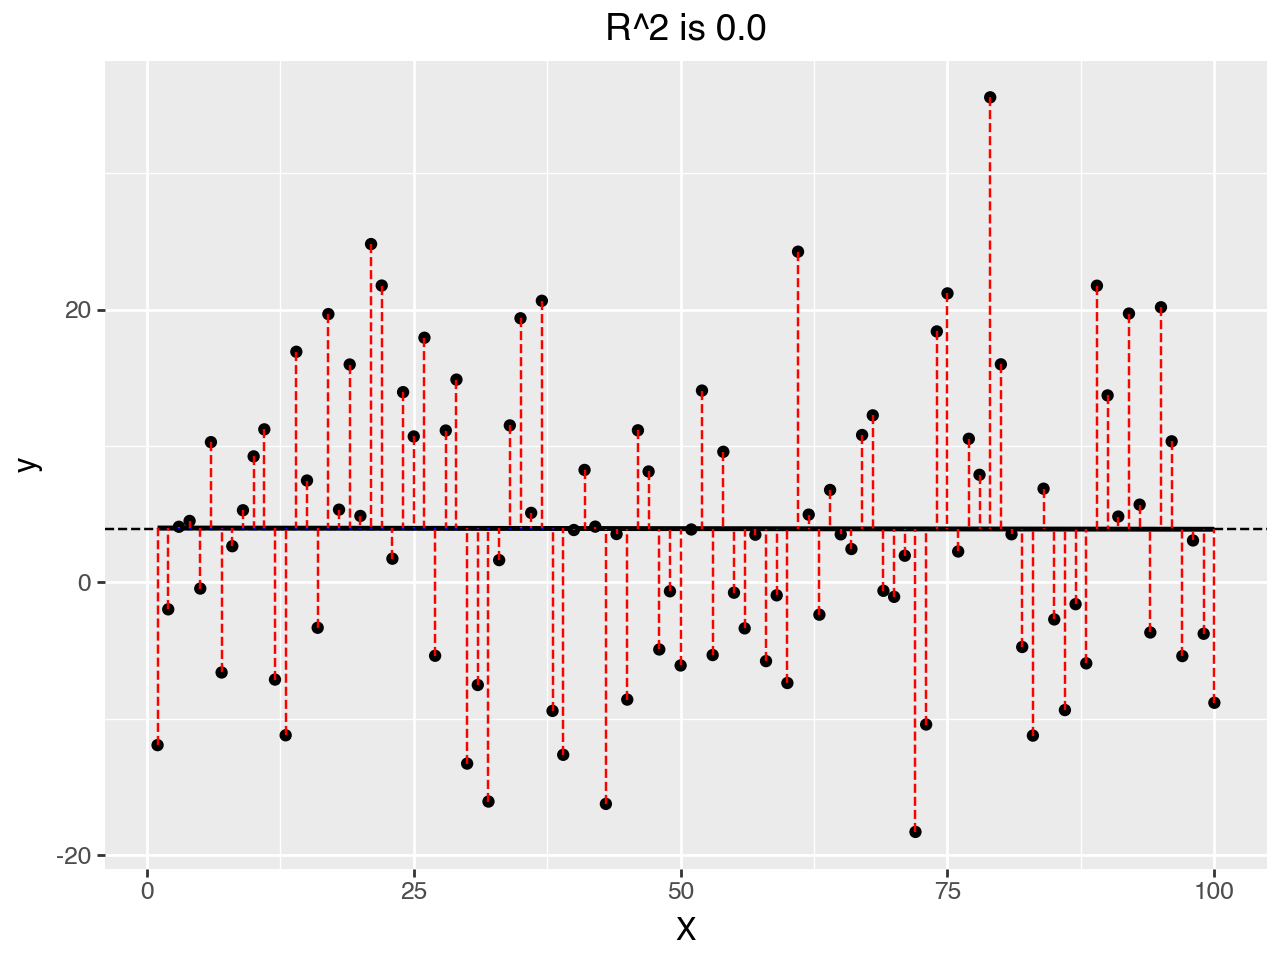

np.float64(0.0006181842523592734)

In [84]:
X, y = generate_data(beta0 = 4, beta1 = .01, sigma = 10, n = 100)
ss_decomp(X, y)

SST (Total Sum of Squares): 99076.736
SSR (Regression Sum of Squares): 89791.1982
SSE (Error Sum of Squares): 9285.5378
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.9063
The F-test will reject the null hypothesis? True


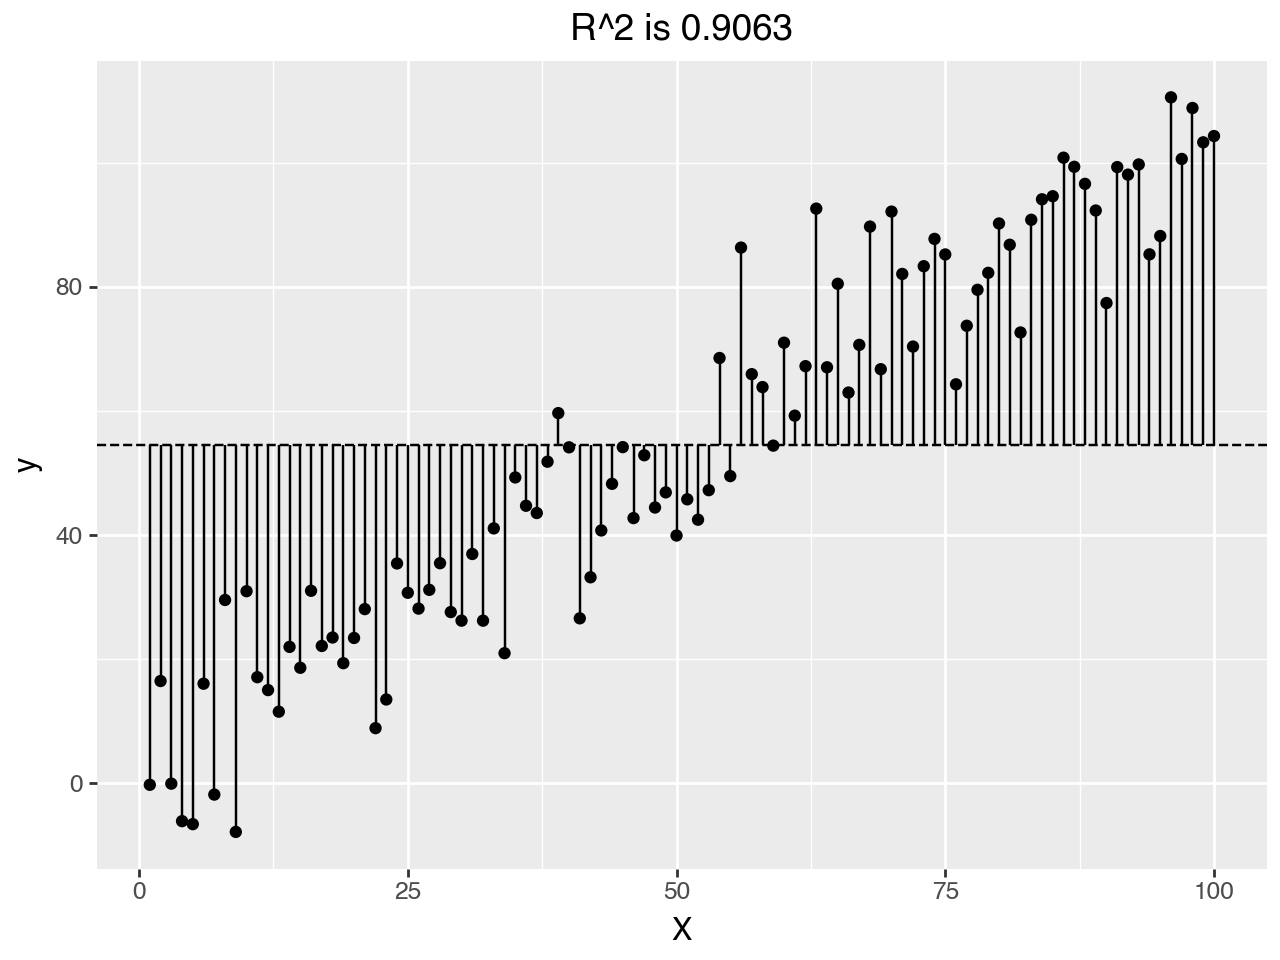

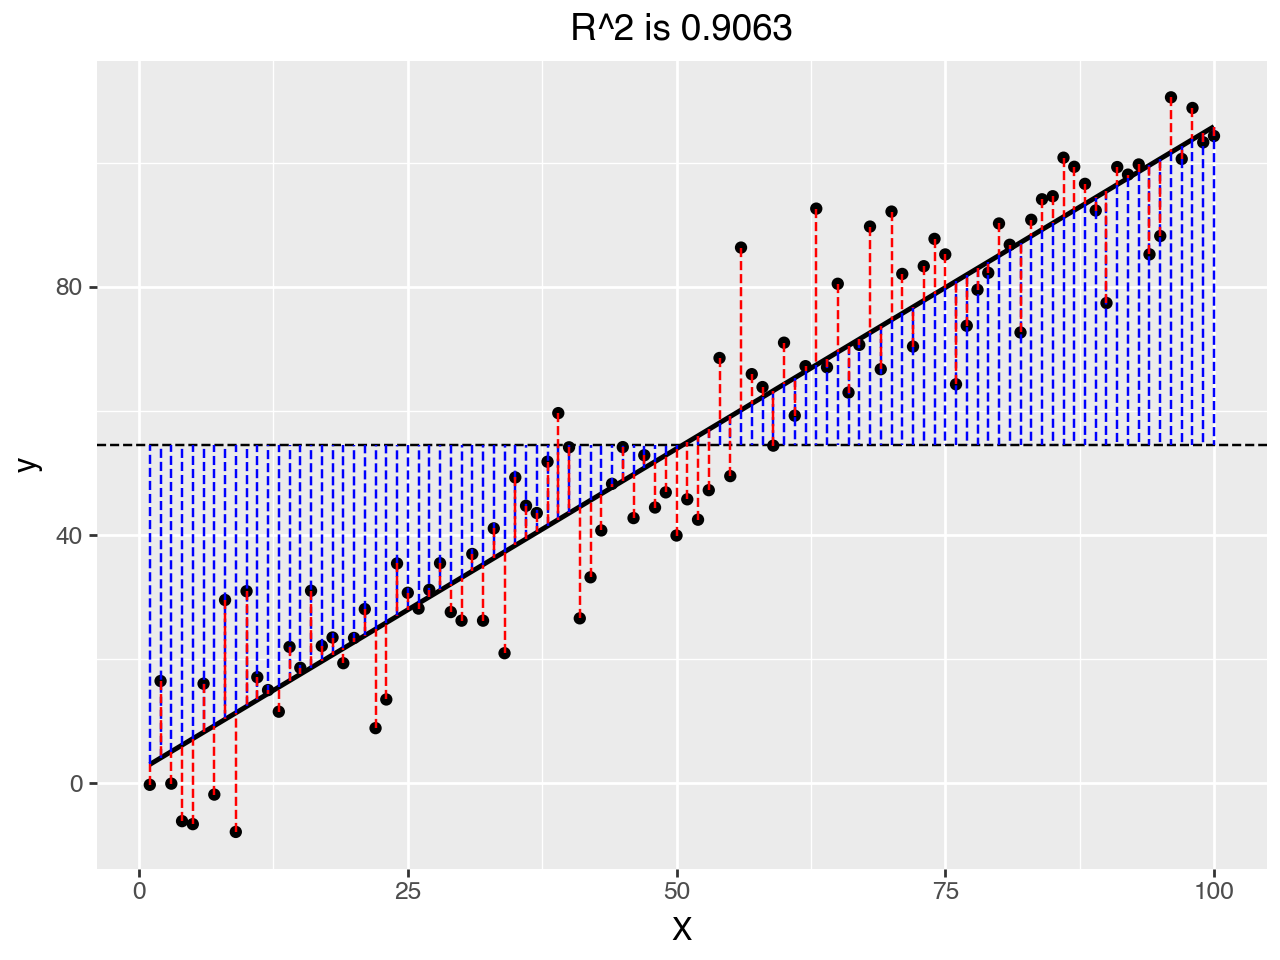

np.float64(947.6605031536245)

In [87]:
X, y = generate_data(beta0 = 4, beta1 = 1, sigma = 10, n = 100)
ss_decomp(X, y)

SST (Total Sum of Squares): 1041413.6689
SSR (Regression Sum of Squares): 195741.2421
SSE (Error Sum of Squares): 845672.4267
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.188
The F-test will reject the null hypothesis? True


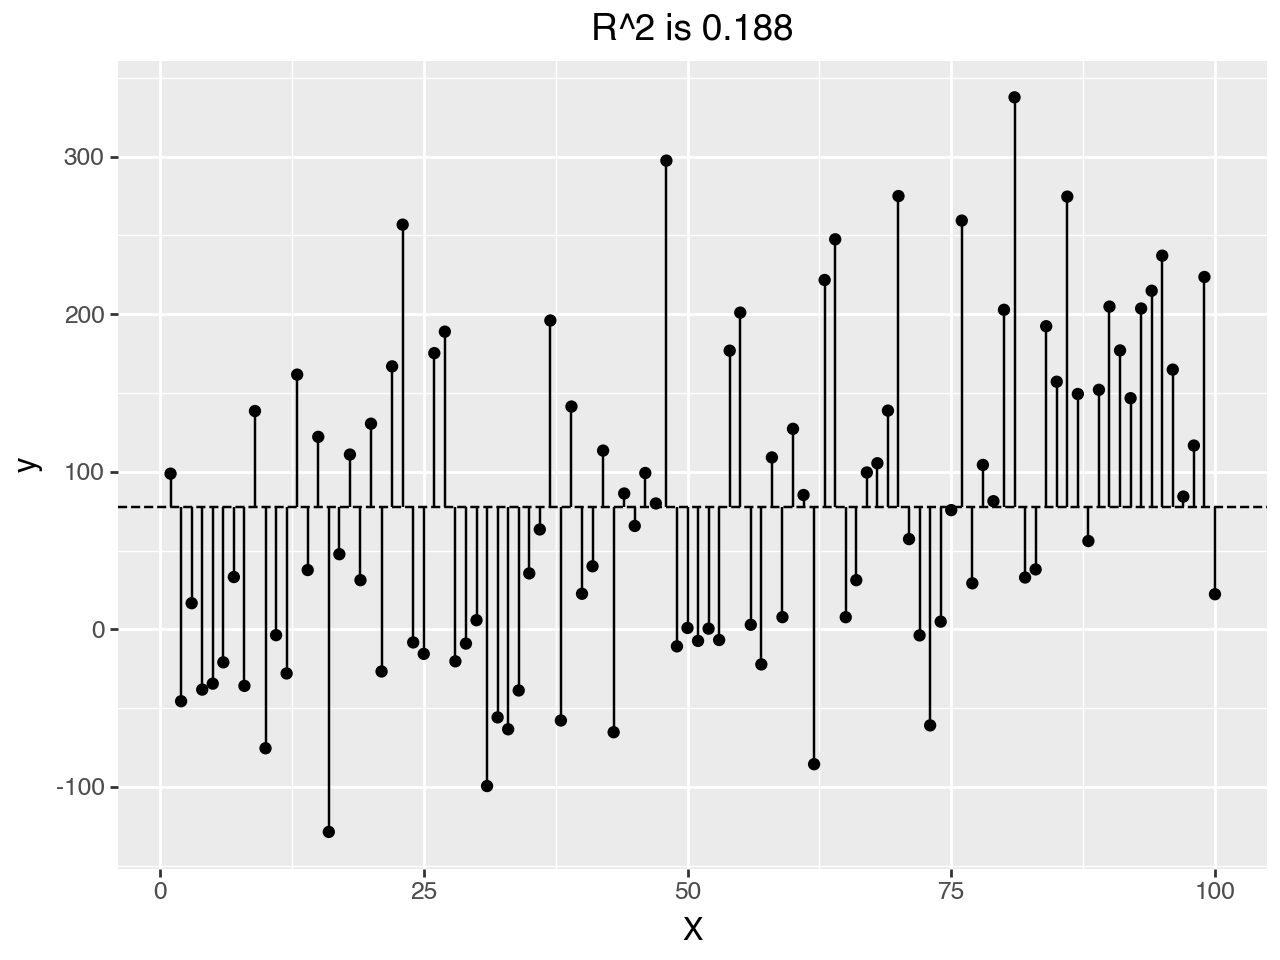

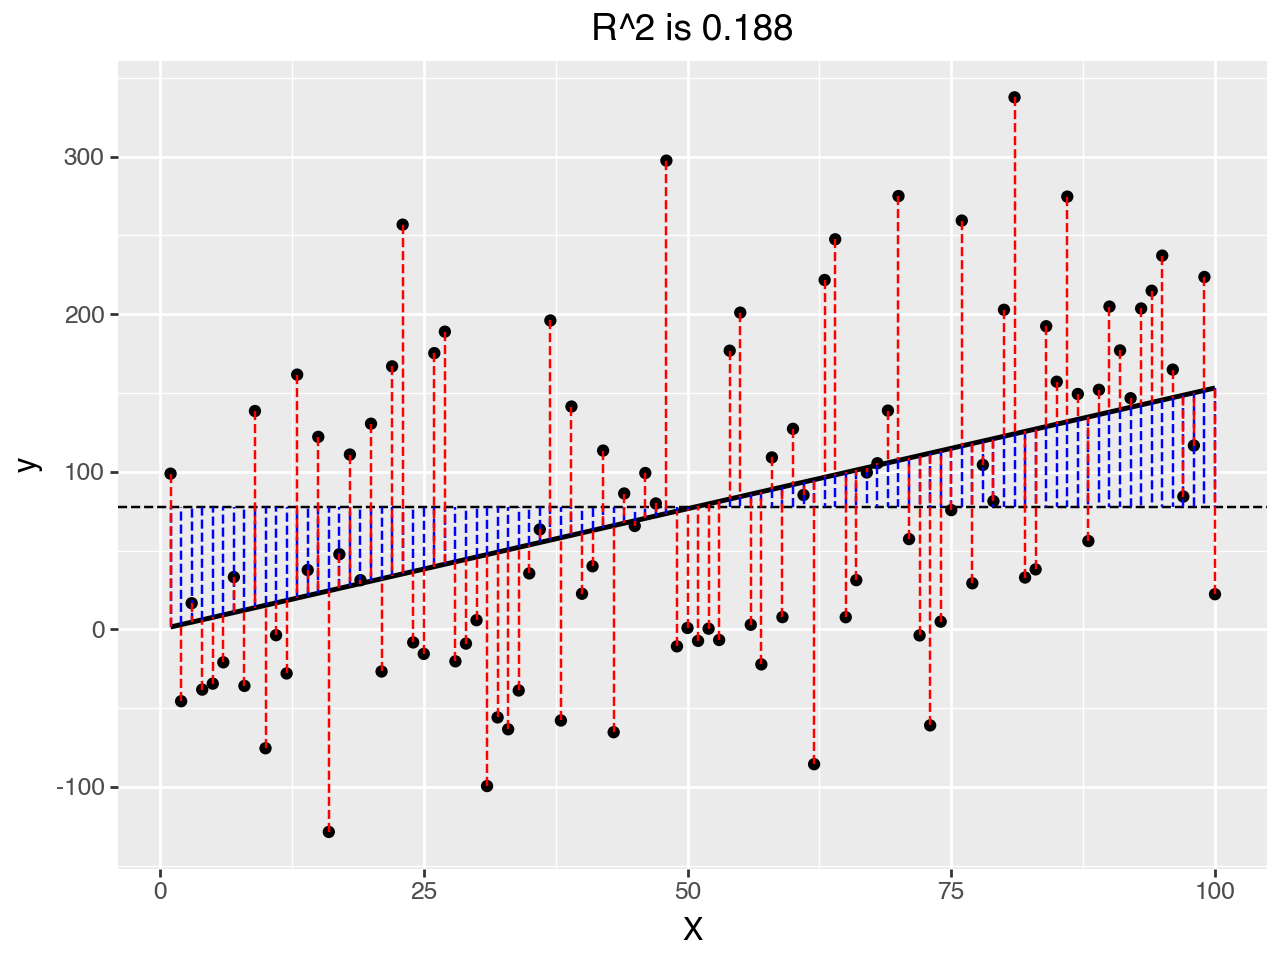

np.float64(22.6833004366181)

In [88]:
X, y = generate_data(beta0 = 4, beta1 = 1, sigma = 100, n = 100)
ss_decomp(X, y)

SST (Total Sum of Squares): 92342762.2805
SSR (Regression Sum of Squares): 674626.3851
SSE (Error Sum of Squares): 91668135.8954
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.0073
The F-test will reject the null hypothesis? False


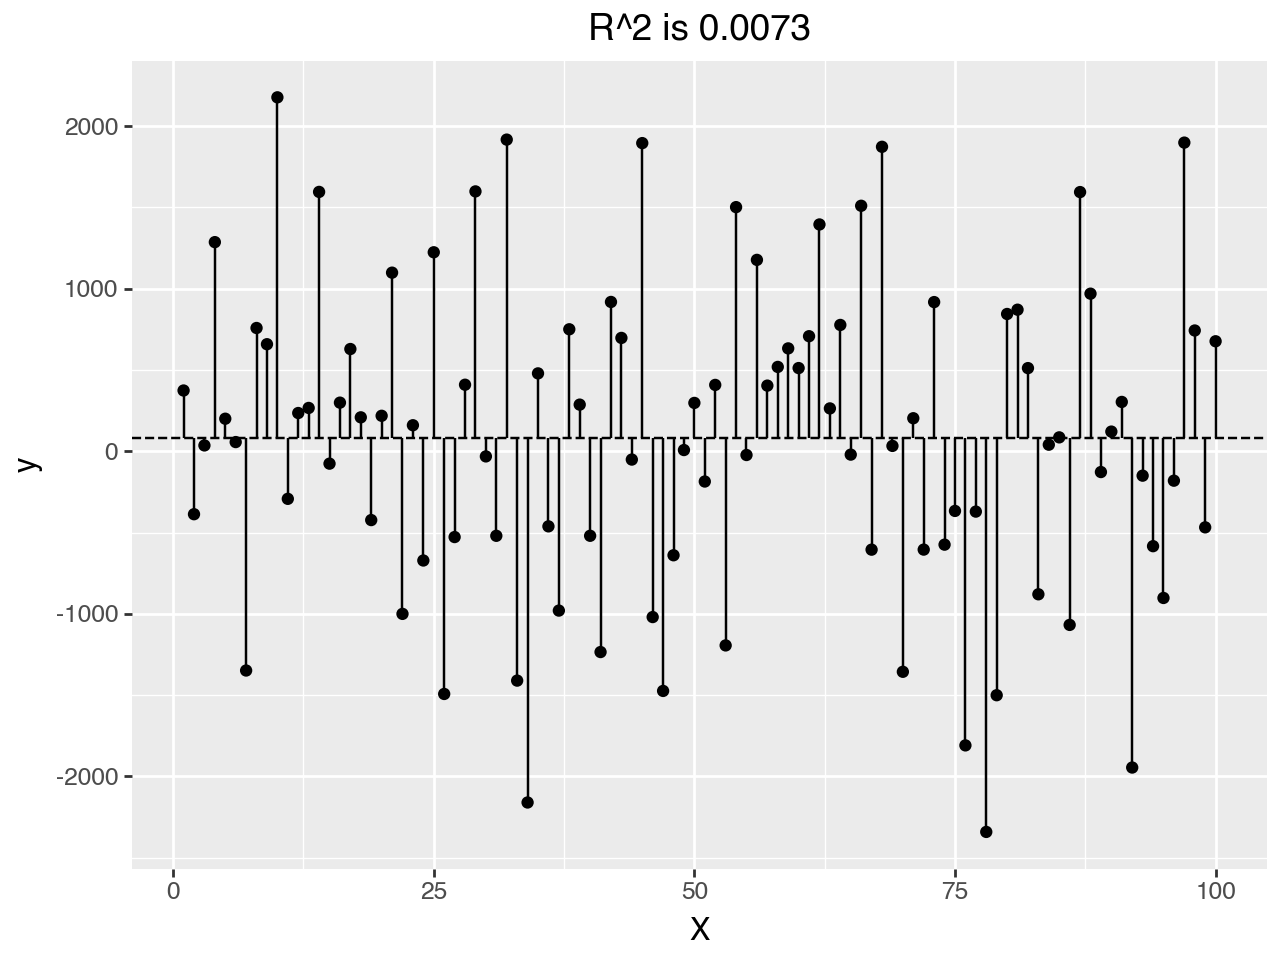

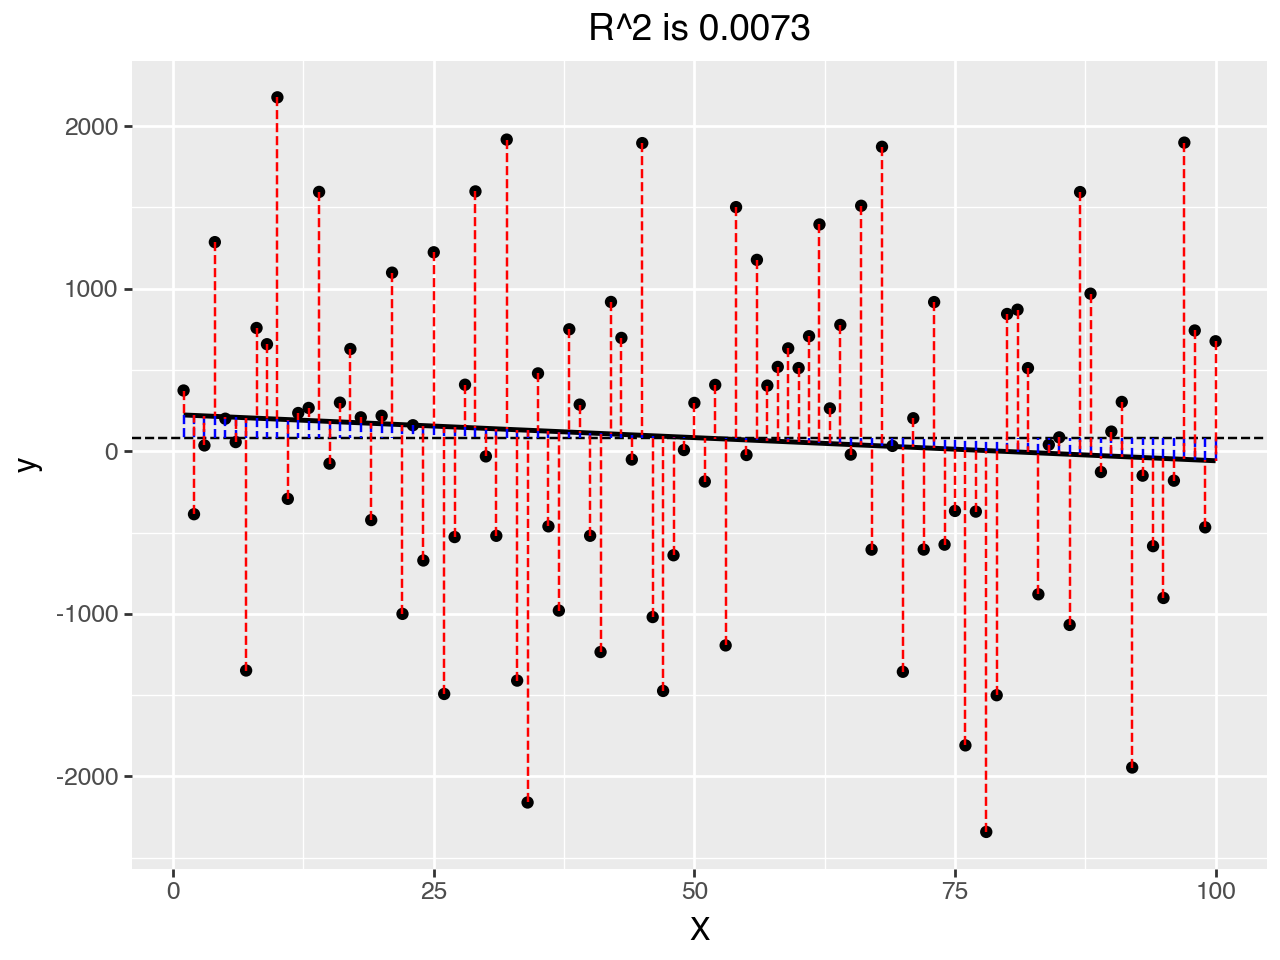

np.float64(0.7212253755791452)

In [89]:
X, y = generate_data(beta0 = 4, beta1 = 1, sigma = 1000, n = 100)
ss_decomp(X, y)

SST (Total Sum of Squares): 398.6987
SSR (Regression Sum of Squares): 15.5458
SSE (Error Sum of Squares): 383.1529
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.039
The F-test will reject the null hypothesis? False


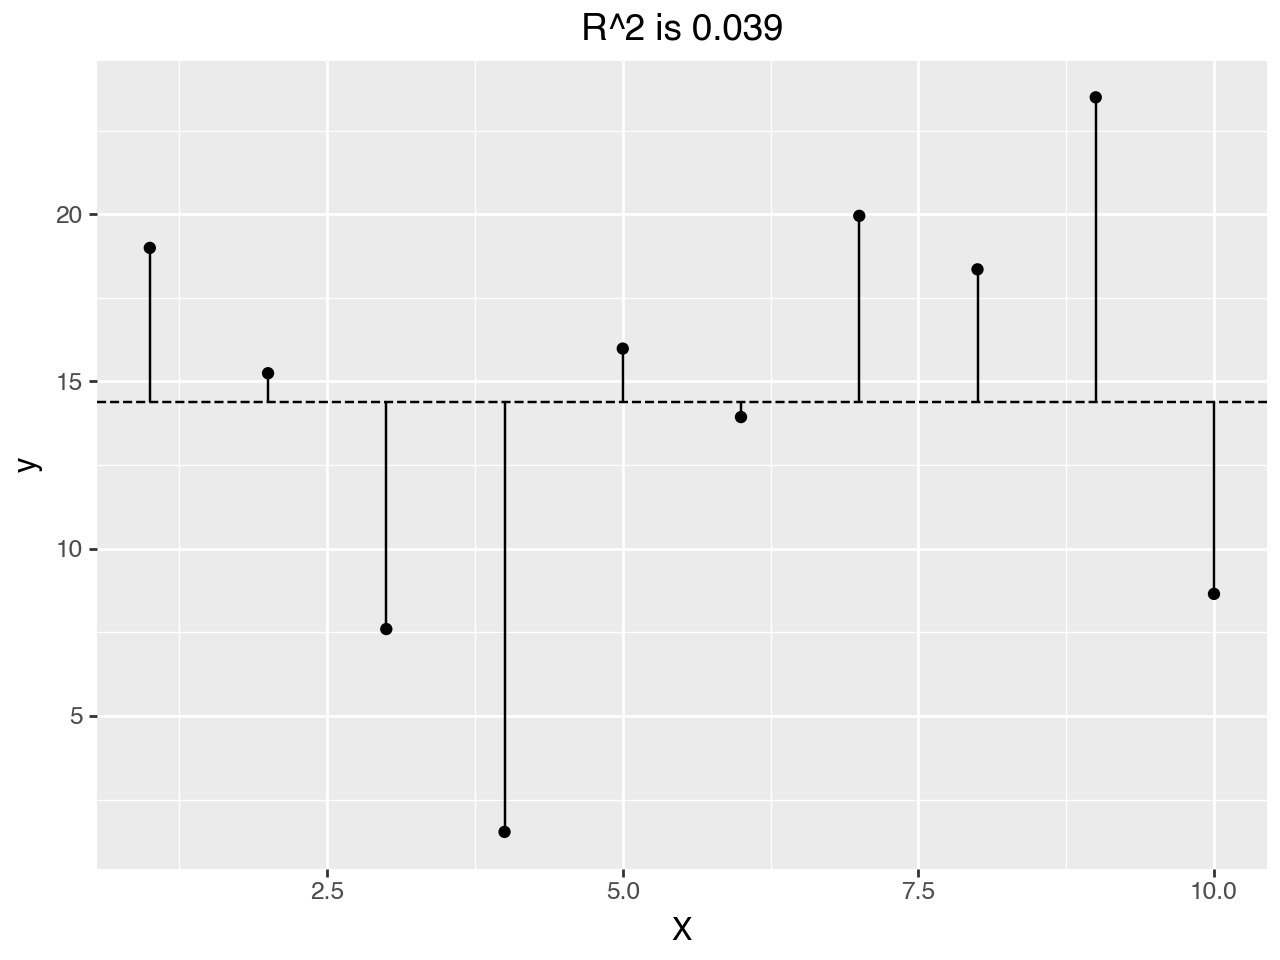

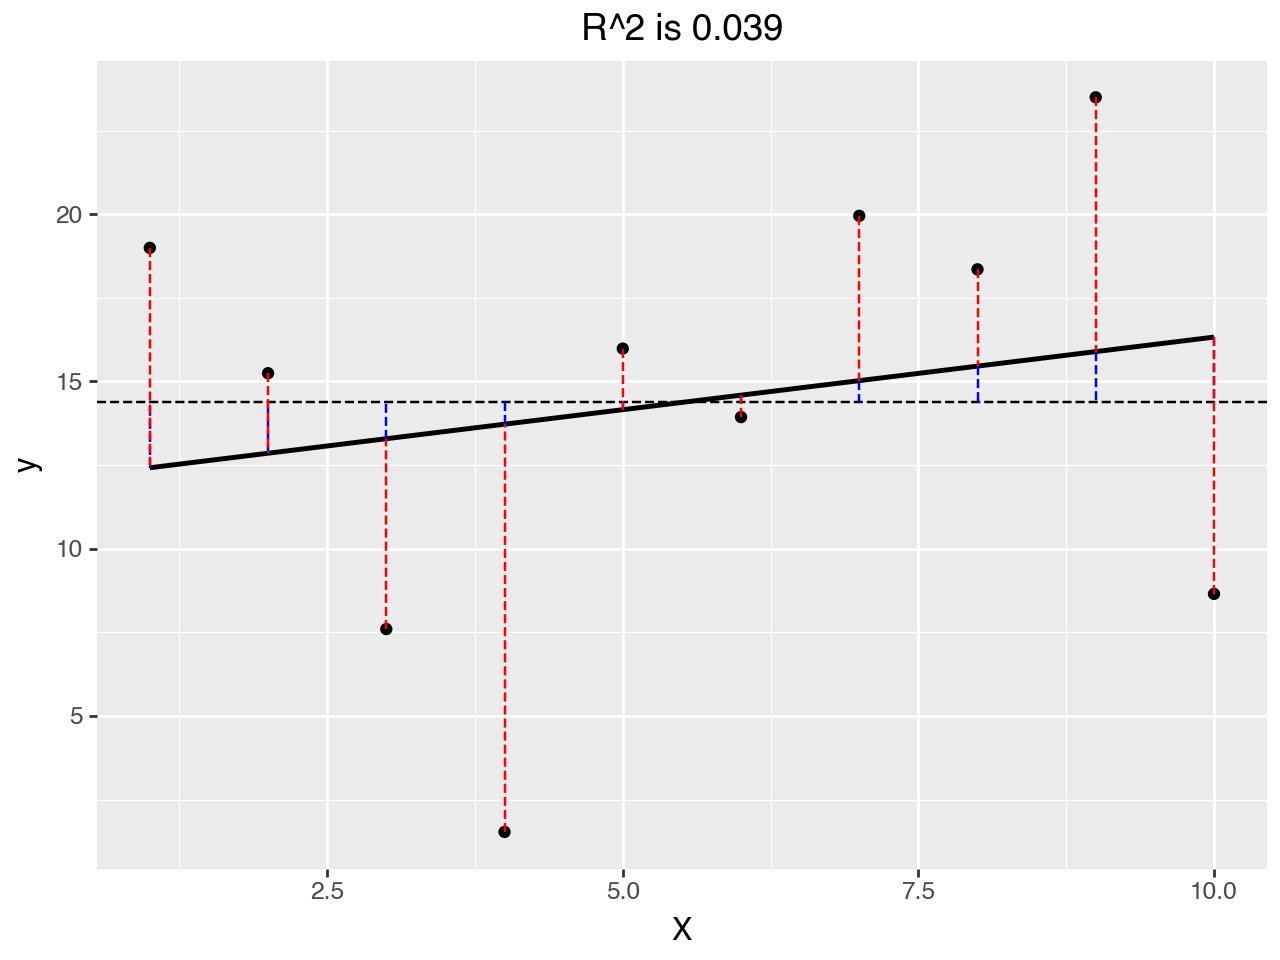

np.float64(0.3245868685843171)

In [90]:
X, y = generate_data(beta0 = 4, beta1 = 1, sigma = 10, n = 10)
ss_decomp(X, y)

SST (Total Sum of Squares): 2546.4133
SSR (Regression Sum of Squares): 498.1894
SSE (Error Sum of Squares): 2048.2239
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.1956
The F-test will reject the null hypothesis? True


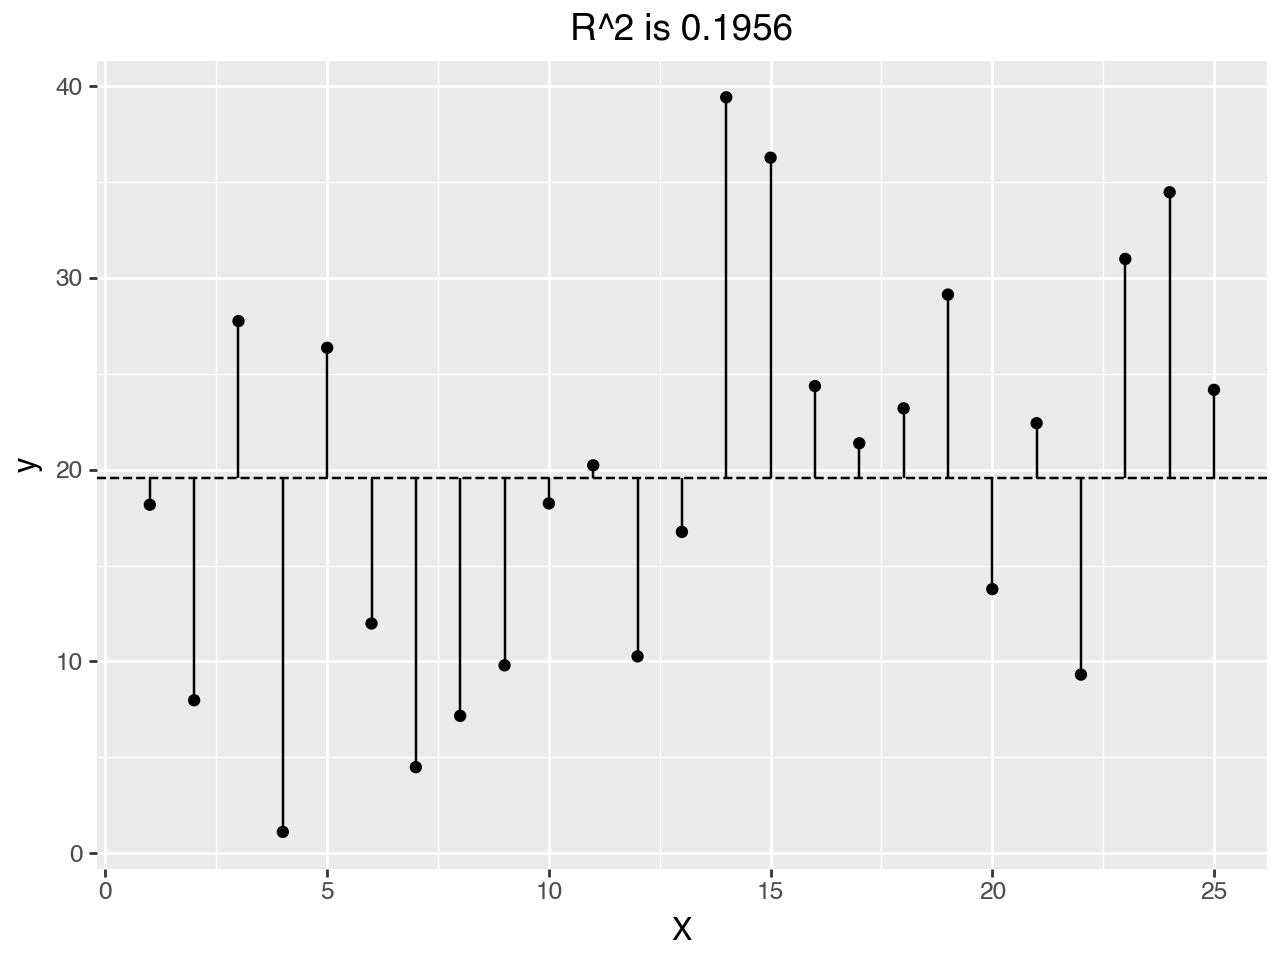

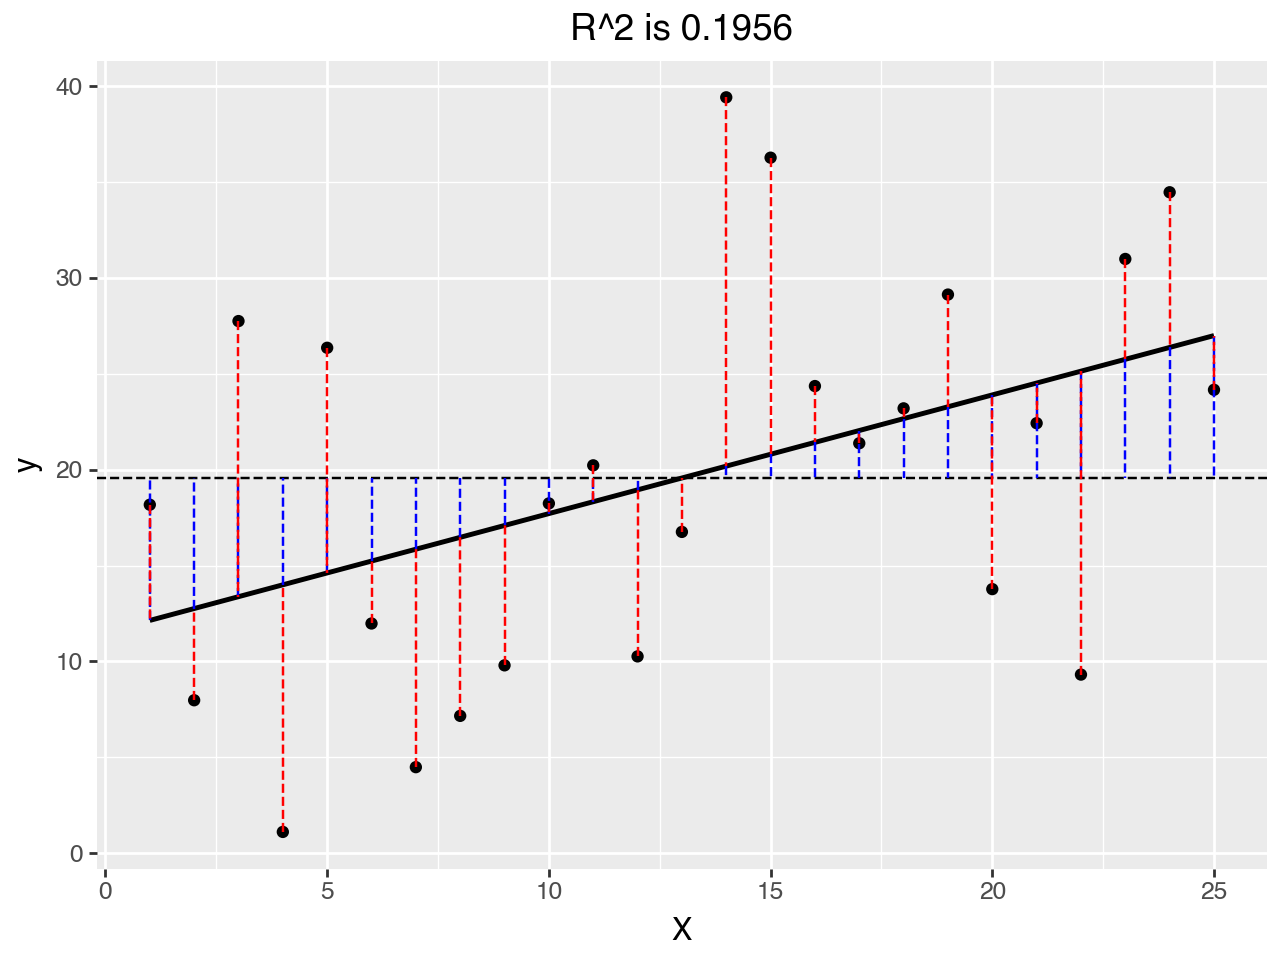

np.float64(5.59428888609297)

In [91]:
X, y = generate_data(beta0 = 4, beta1 = 1, sigma = 10, n = 25)
ss_decomp(X, y)

SST (Total Sum of Squares): 110539.8587
SSR (Regression Sum of Squares): 931.1815
SSE (Error Sum of Squares): 109608.6772
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.0084
The F-test will reject the null hypothesis? False


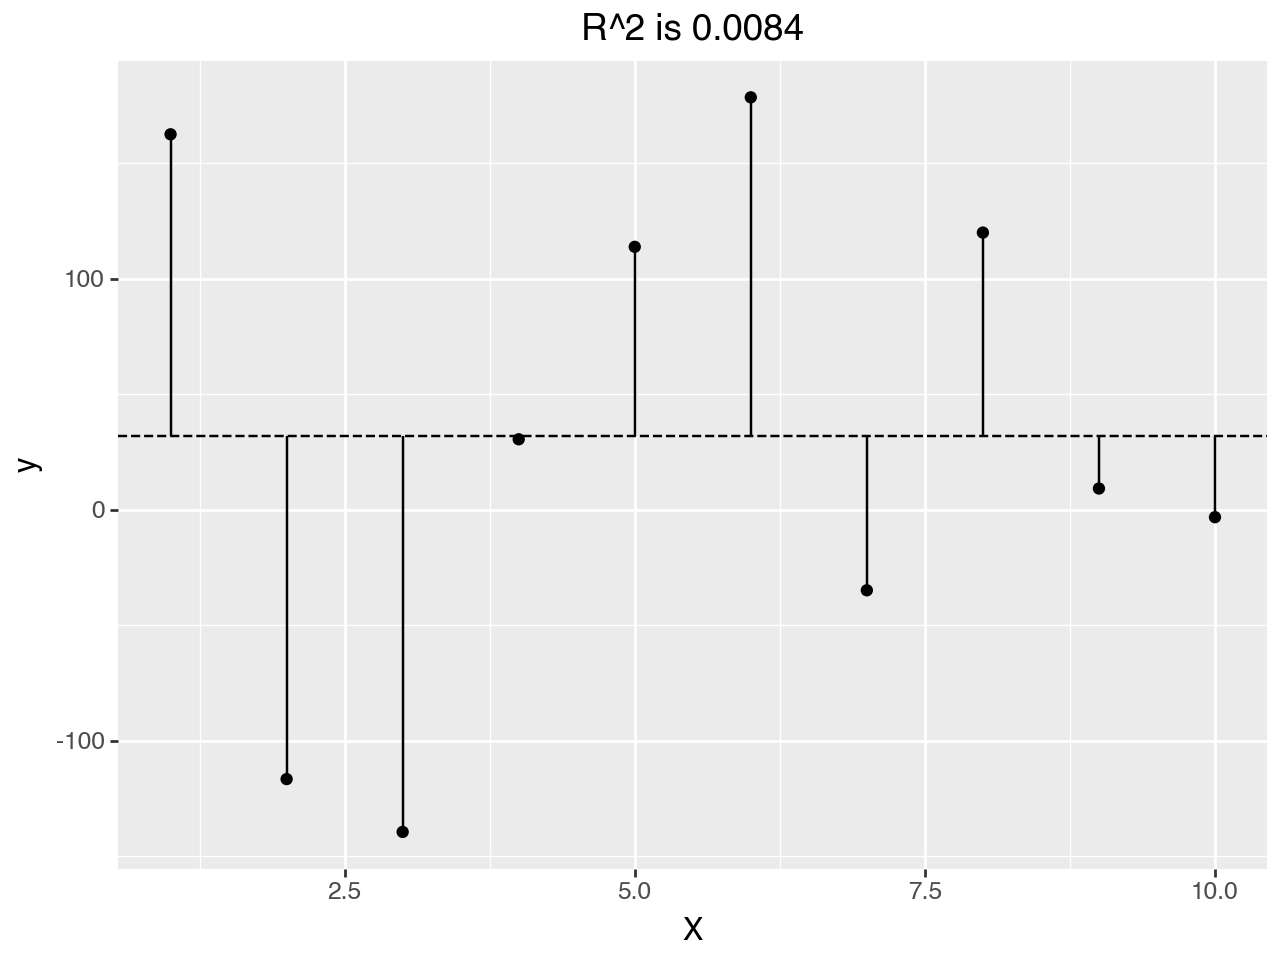

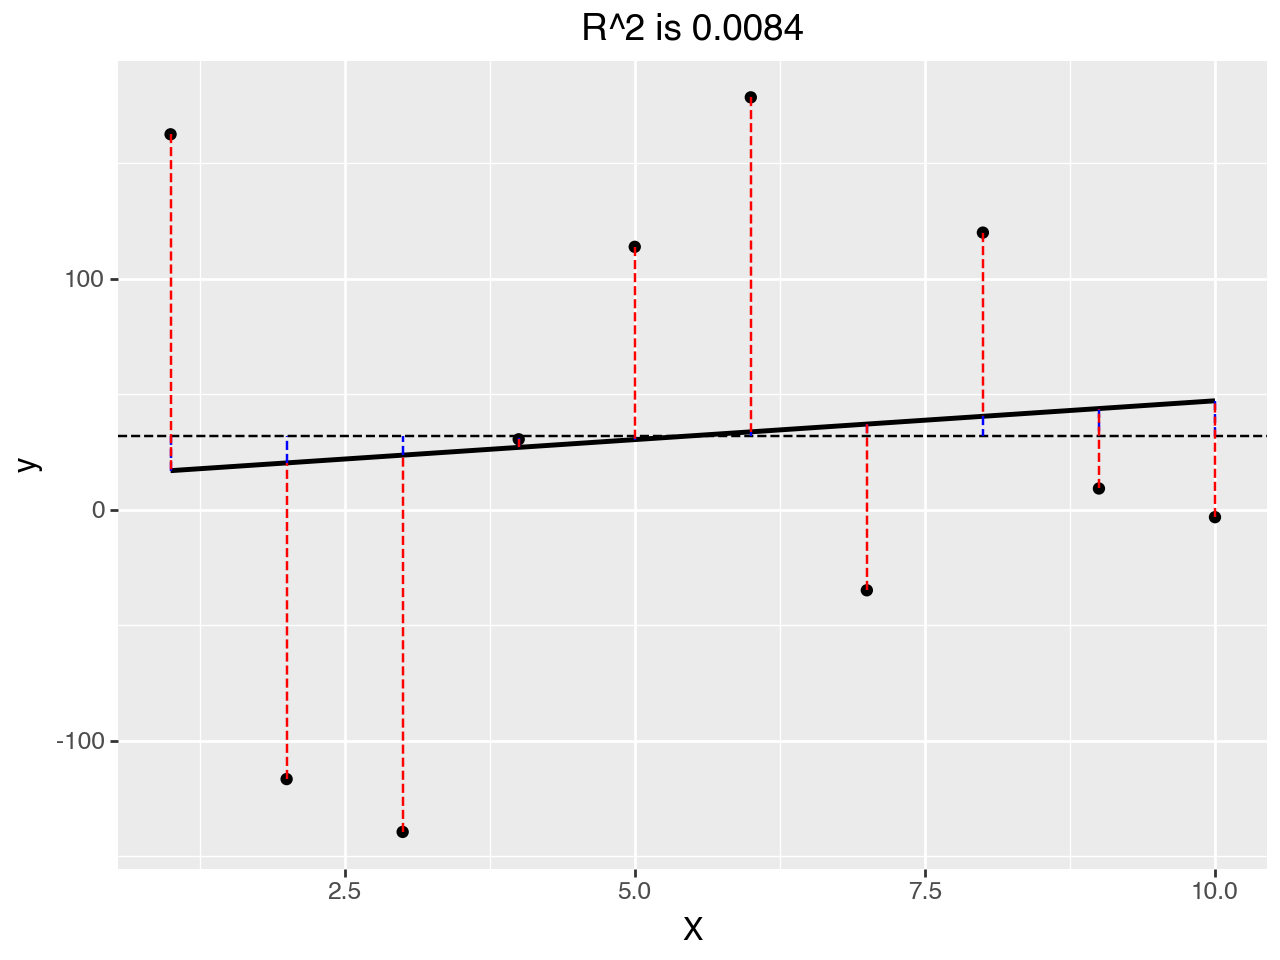

np.float64(0.06796407173500676)

In [92]:
X, y = generate_data(beta0 = 4, beta1 = 1, sigma = 100, n = 10)
ss_decomp(X, y)

SST (Total Sum of Squares): 519216.8452
SSR (Regression Sum of Squares): 42266.4088
SSE (Error Sum of Squares): 476950.4364
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.0814
The F-test will reject the null hypothesis? True


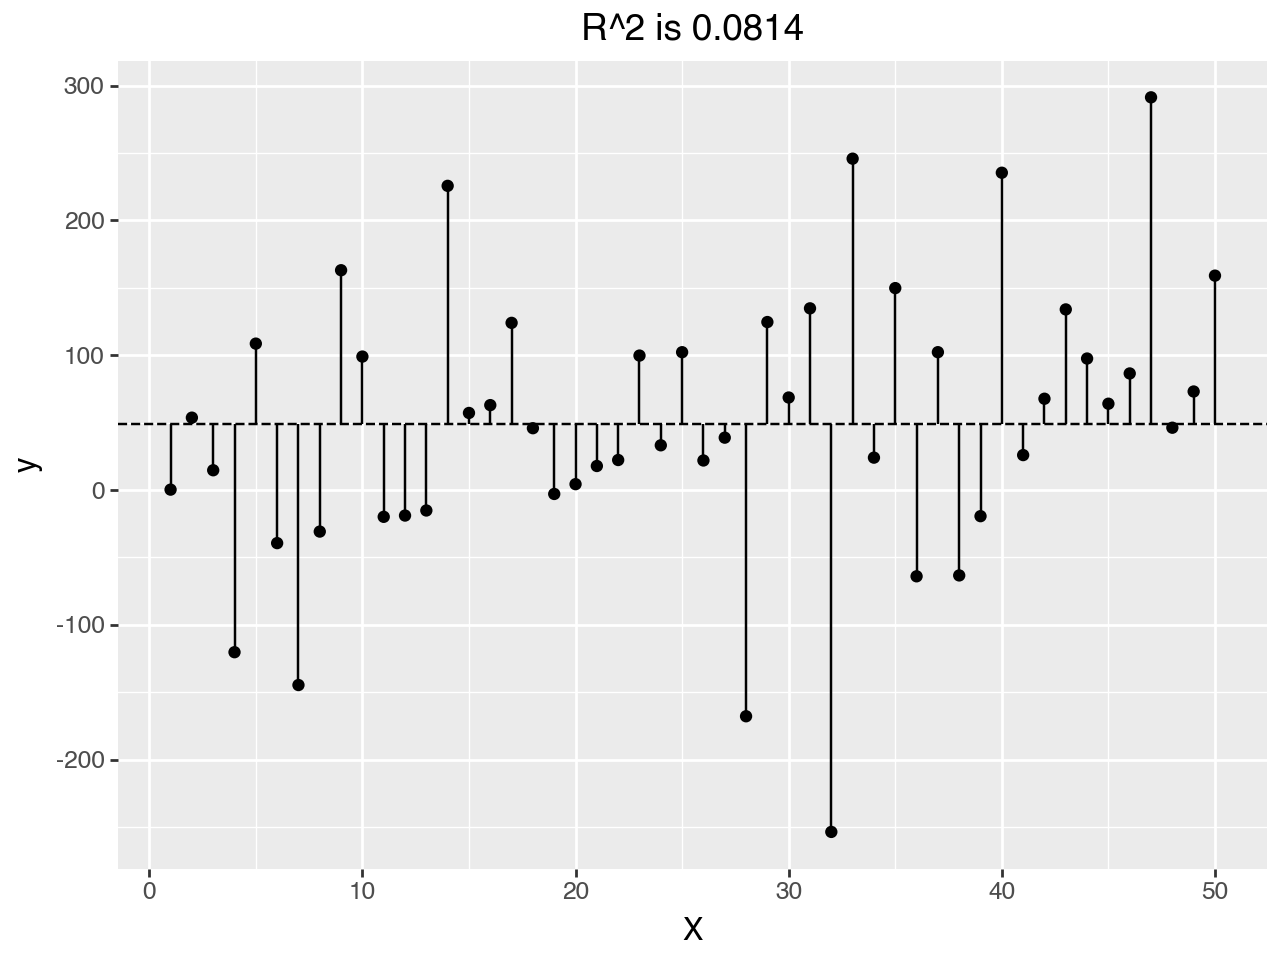

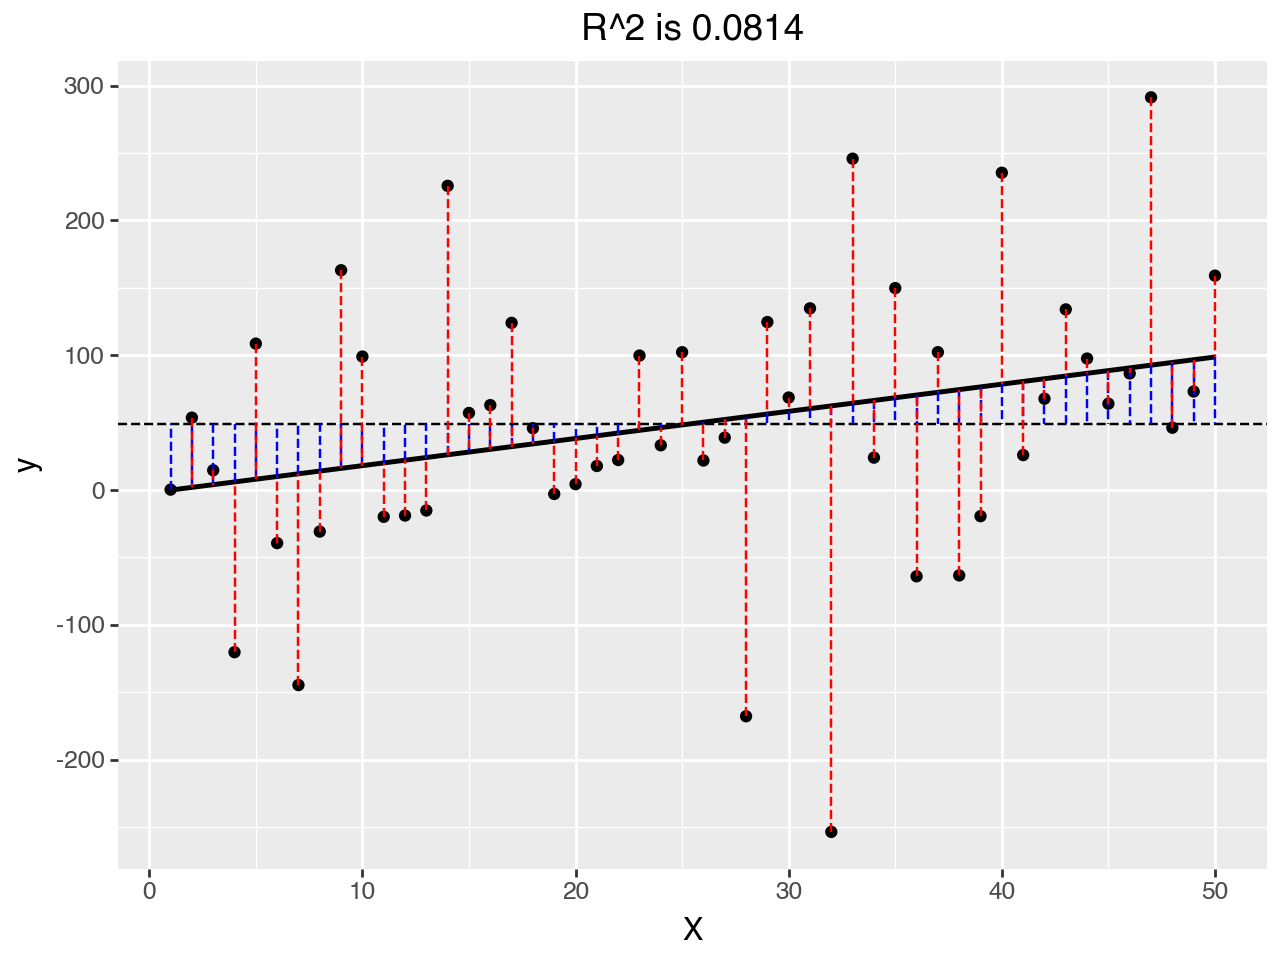

np.float64(4.253665512318629)

In [94]:
X, y = generate_data(beta0 = 4, beta1 = 1, sigma = 100, n = 50)
ss_decomp(X, y)

In [64]:
f.ppf(0.95, dfn=1, dfd=8)

np.float64(5.317655071578714)

In [44]:
# Calculate the F-value at the 0.95 quantile
f_value = f.ppf(0.95, dfn=1, dfd=8)

f_value

np.float64(5.317655071578714)

SST (Total Sum of Squares): 1168.9356
SSR (Regression Sum of Squares): 1015.9379
SSE (Error Sum of Squares): 152.9977
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.8691


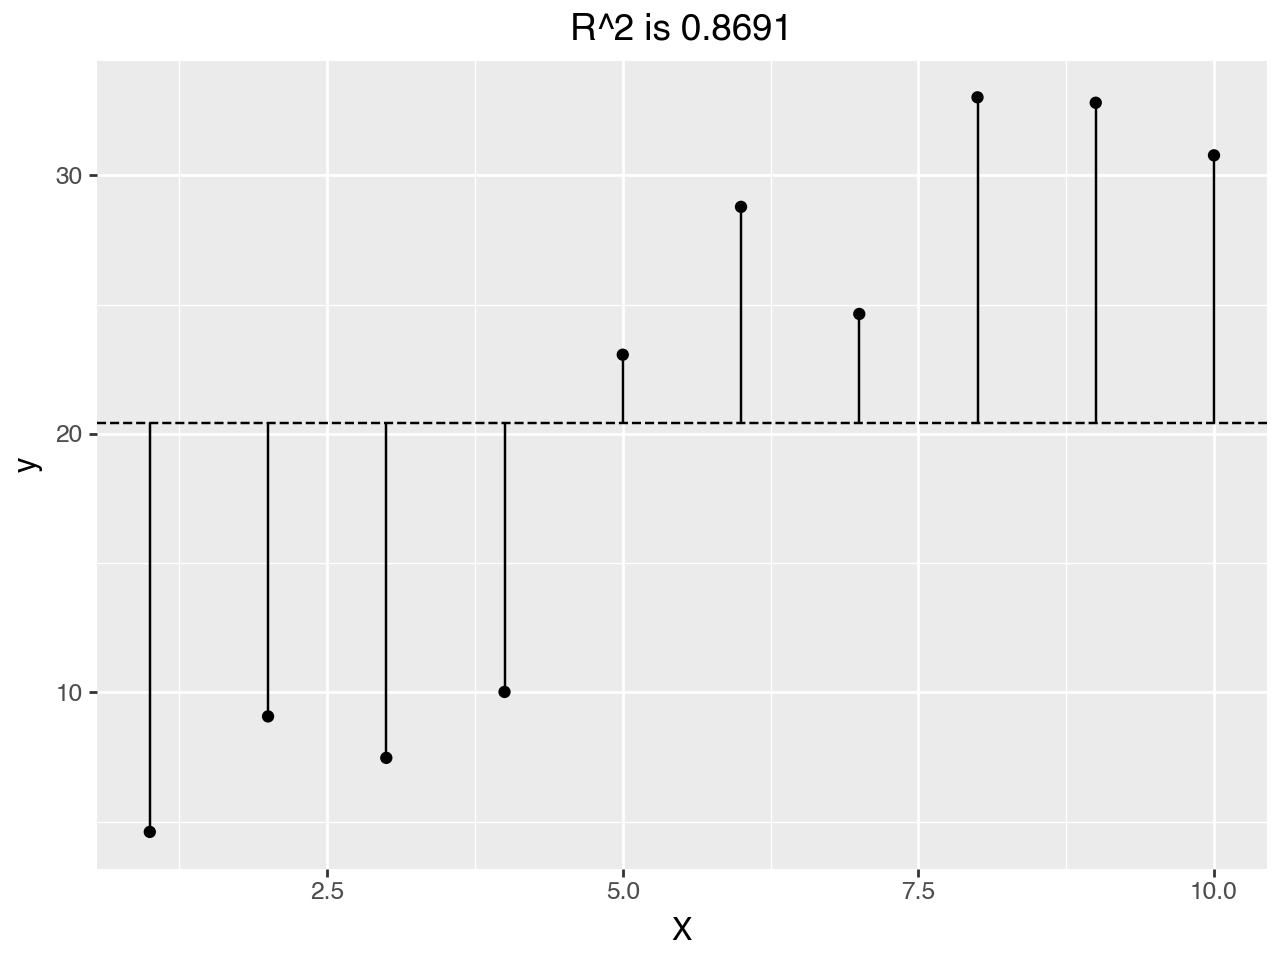

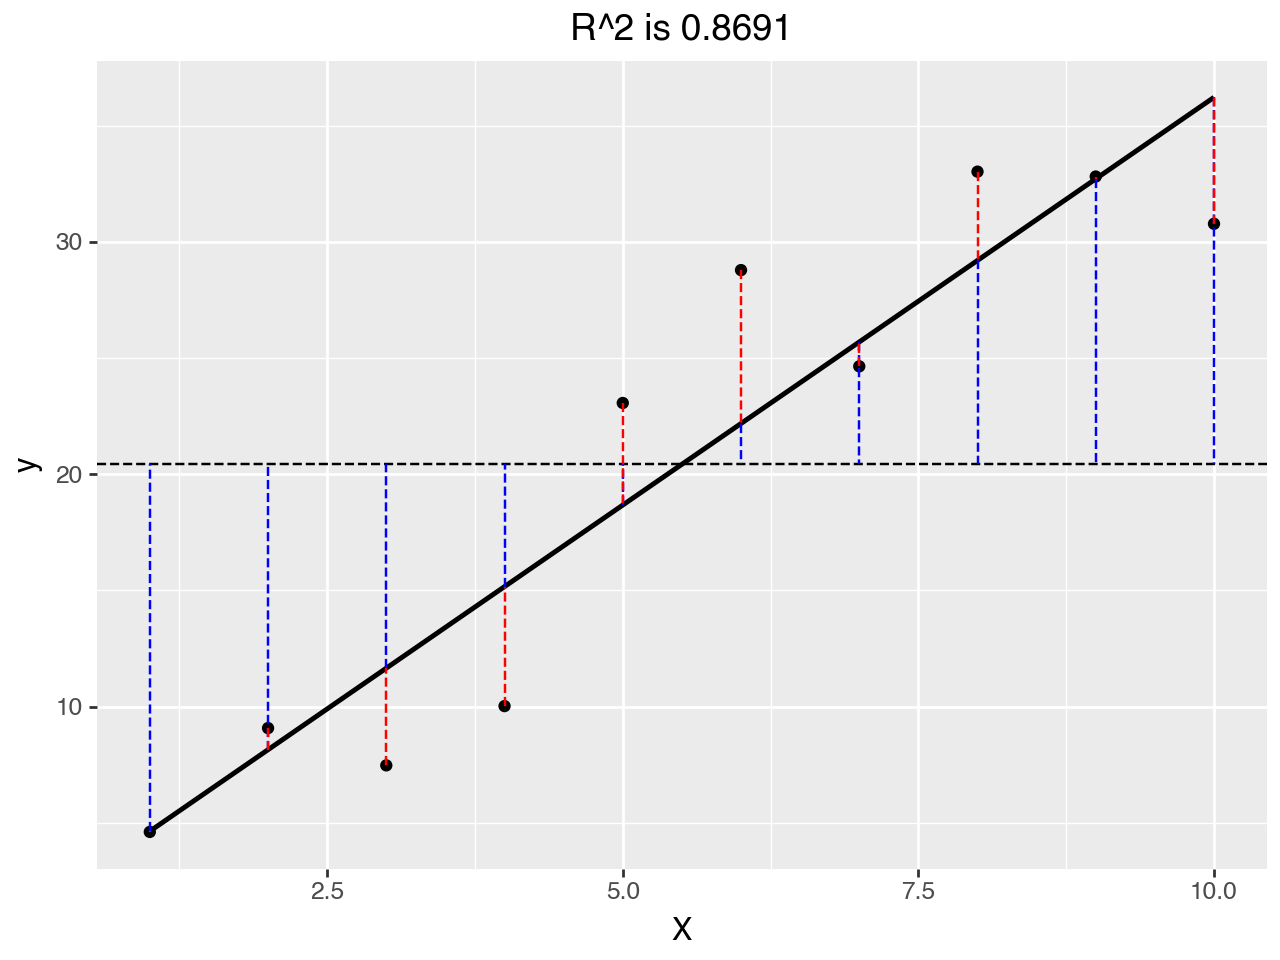

(<plotnine.ggplot.ggplot at 0x31df336c0>,
 <plotnine.ggplot.ggplot at 0x31df33790>)

In [45]:
X, y = generate_data(sigma = 5)
ss_decomp(X, y)

SST (Total Sum of Squares): 1387.0692
SSR (Regression Sum of Squares): 76.8824
SSE (Error Sum of Squares): 1310.1868
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.0554


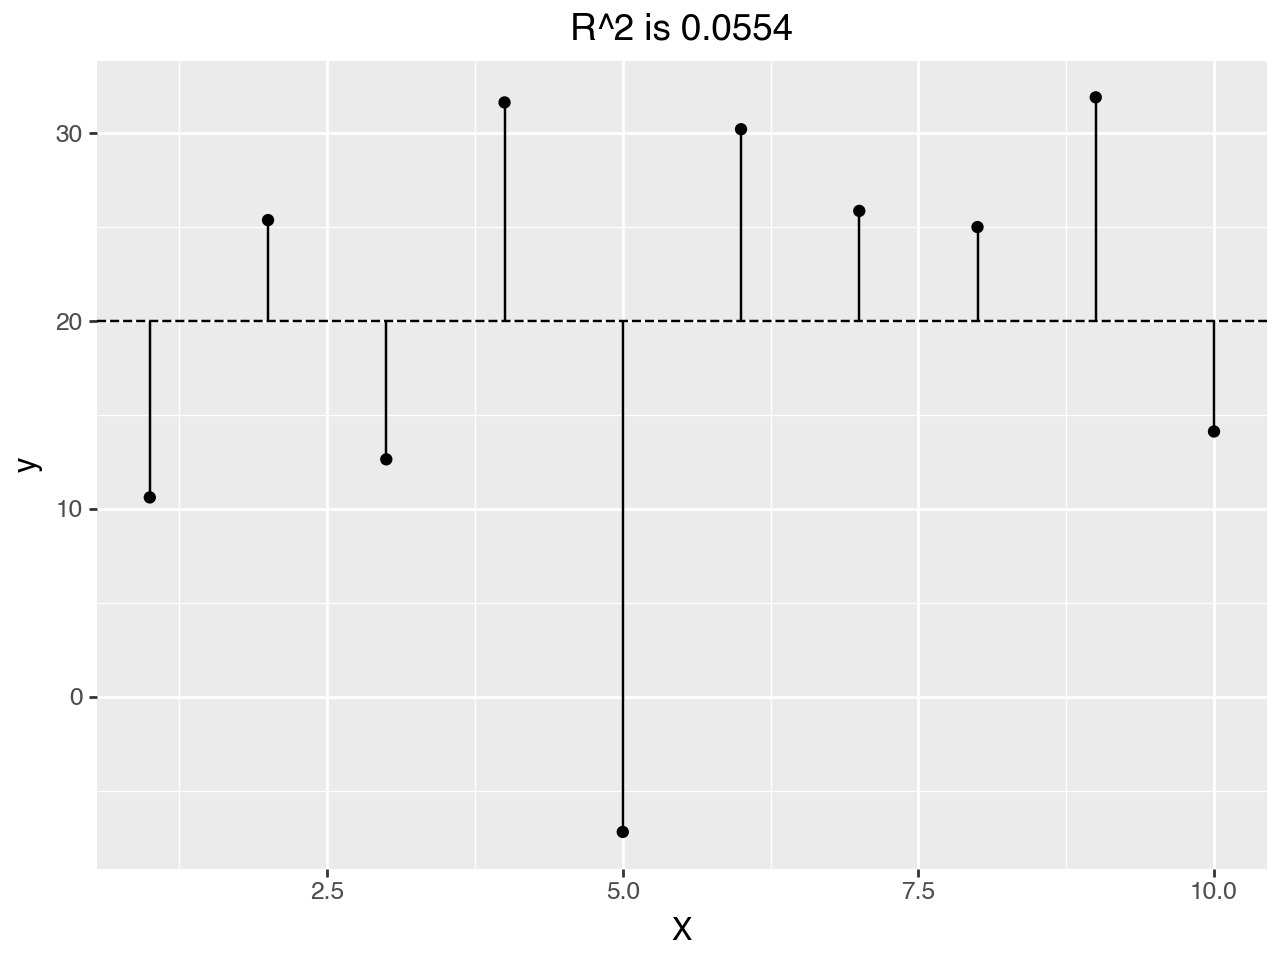

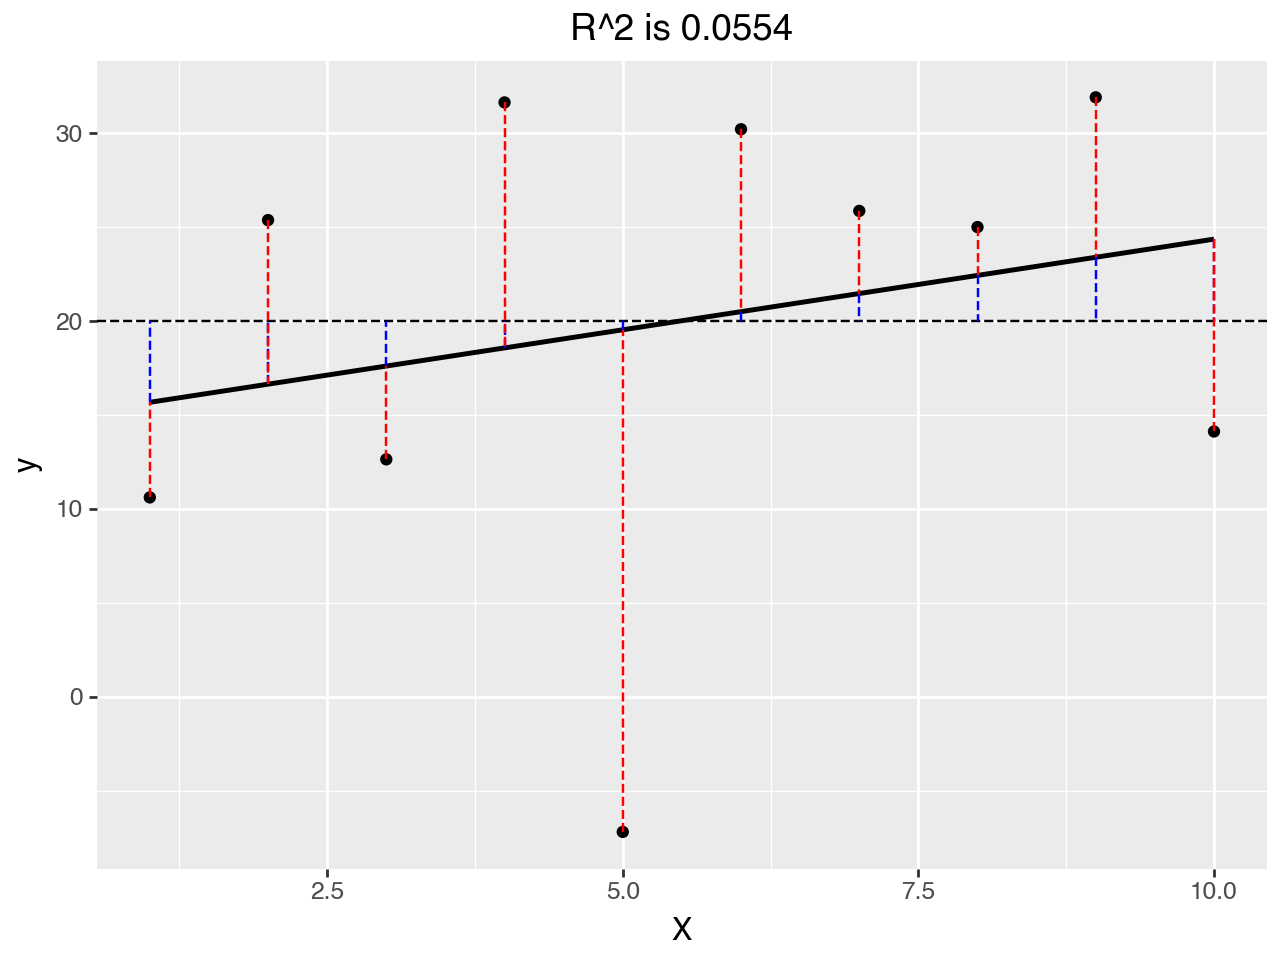

(<plotnine.ggplot.ggplot at 0x31e369cc0>,
 <plotnine.ggplot.ggplot at 0x31e36a5b0>)

In [46]:
X, y = generate_data(sigma = 10)
ss_decomp(X, y)

SST (Total Sum of Squares): 49729.5534
SSR (Regression Sum of Squares): 534.643
SSE (Error Sum of Squares): 49194.9103
SST = SSR + SSE: True
Coefficient of Determination, R^2 is: 0.0108


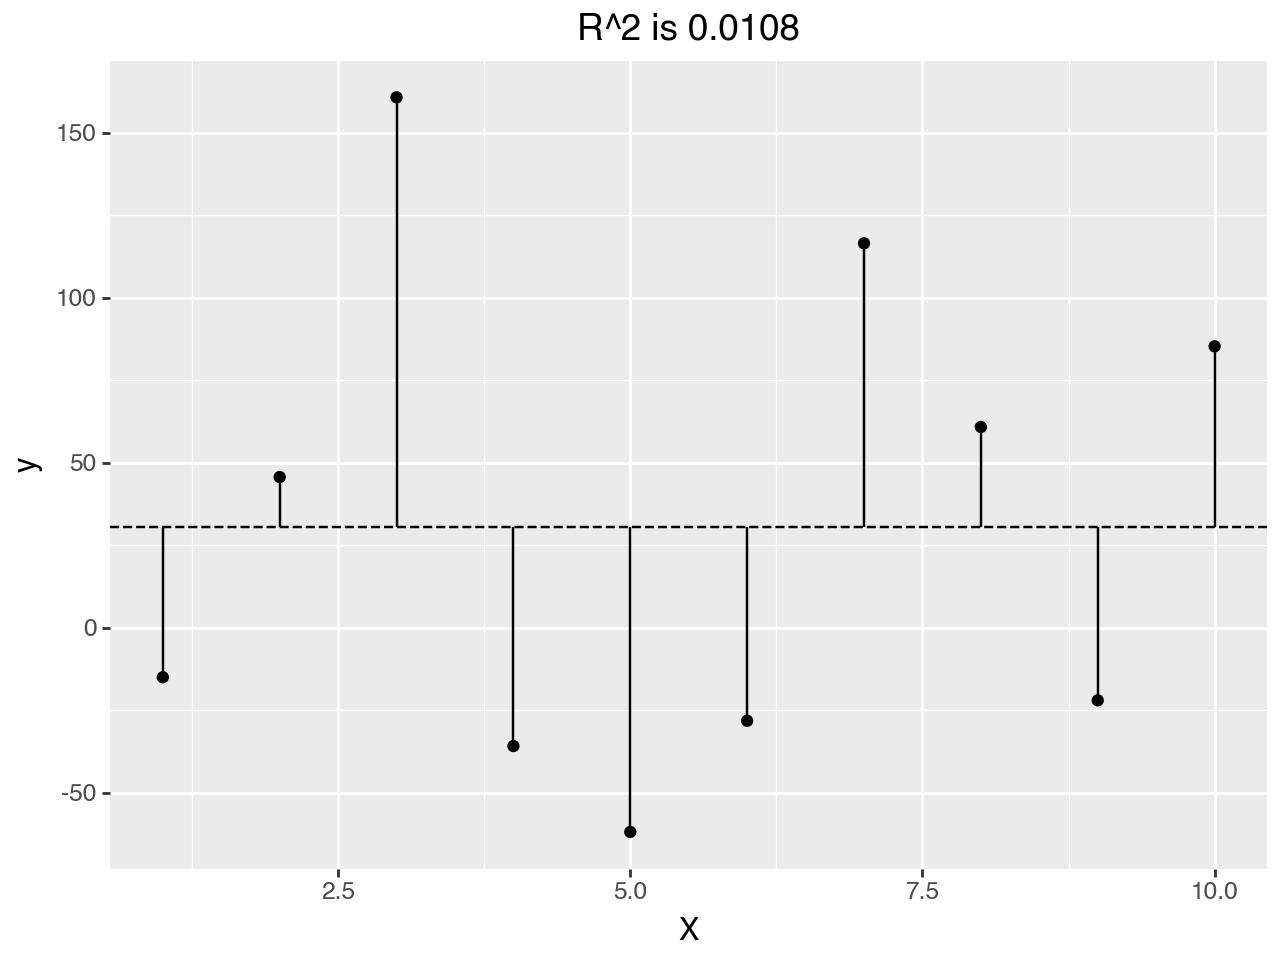

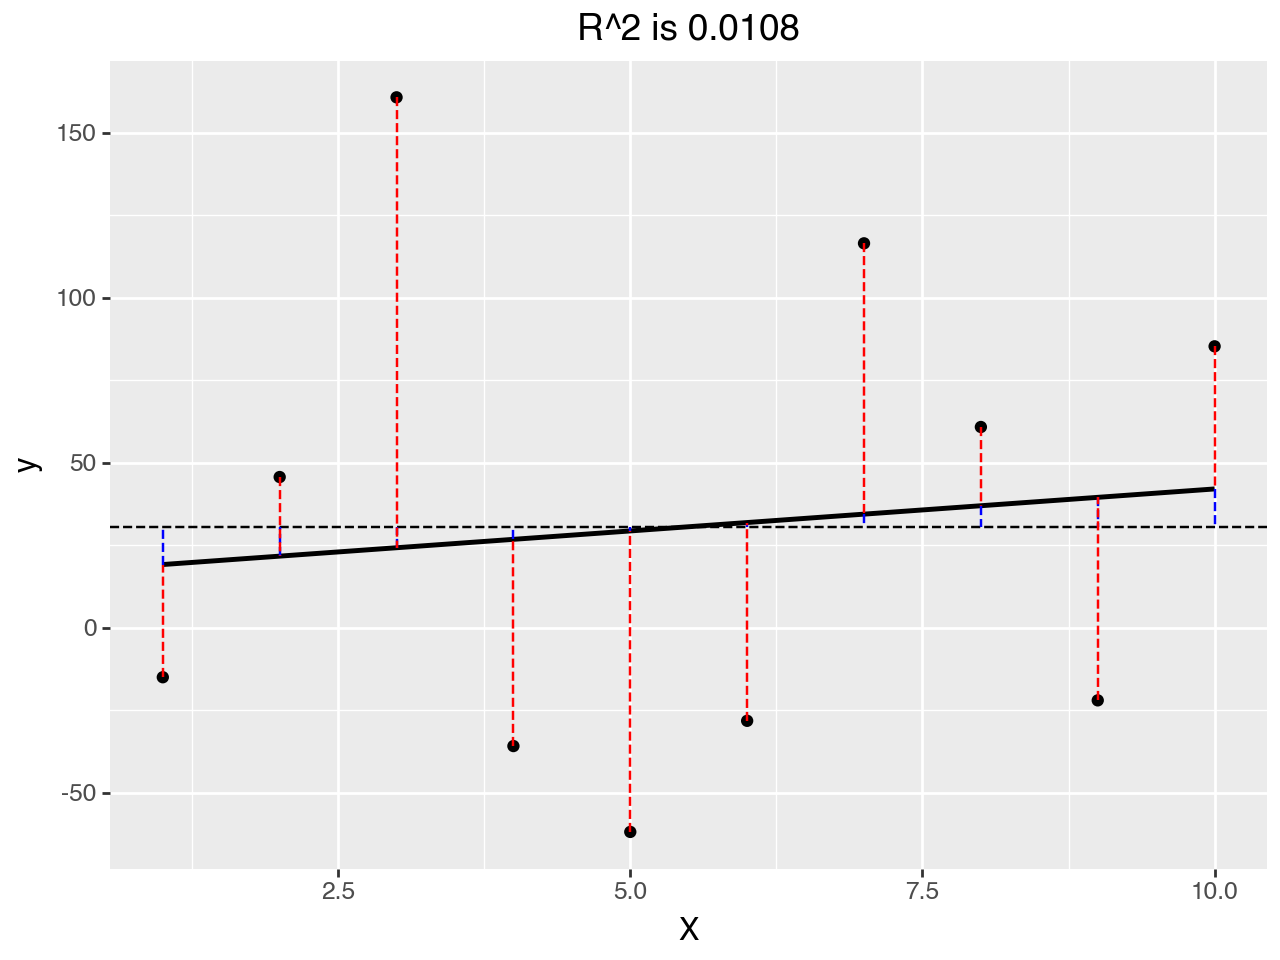

(<plotnine.ggplot.ggplot at 0x31e36bd40>,
 <plotnine.ggplot.ggplot at 0x31e0ea9c0>)

In [47]:
X, y = generate_data(sigma = 100)
ss_decomp(X, y)

## Exercises:

1. Modify the data generation function to take the slope, intercept, and sample size as arguments.
2. Modify the SS decomposition function to conduct the F-test for testing whether the true slope is zero or not.
4. Holding the intercept, sample size, and error variance constant, compare how different values of the slope affect:
   
    a.  the SS decomposition,\
    b. the plots,\
    c. the coefficient of determination, and\
    d. the hypothesis test results.\
   What do you find?
5. Holding the slope, sample size, and error variance constant, compare how different values of the intercept affect:\
    a.  the SS decomposition,\
    b. the plots,\
    c. the coefficient of determination, and\
    d. the hypothesis test results.\
   What do you find?
6. Holding the intercept, slope, and error variance constant, compare how different values of the sample size affect:\
    a.  the SS decomposition,\
    b. the plots,\
    c. the coefficient of determination, and\
    d. the hypothesis test results.\
   What do you find?
7. Write a function which calculates the t-statistic for testing whether the true slope is zero or not. For each simulation you run, calculate both the t-stat and the F-stat. Repeat this $B=$100 times, then plot the ordered pairs $\{(t_b, F_b)\}_{b=1}^B$ as a scatter plot. What relationship do you observe between them? Can you prove this relation?


In [16]:
def generate_data(sigma, slope,intercept,n):
    X = np.linspace(start=1, stop=n, num=n).reshape(-1, 1) #array w/ 1 column, the -1 means 'infer the # of rows'

    # Define parameters
    beta0 = intercept
    beta1 = slope
    
    # Generate epsilon as a 1D array of N(0, sigma^2) RVs
    epsilon = sigma * np.random.randn(n)
    
    # Generate y using SLR model
    y = beta0 + beta1 * X.flatten() + epsilon

    return X, y 

In [9]:
import scipy.stats as stat

In [13]:
def ss_decomp(X, y):

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate the mean of y
    y_mean = np.mean(y)

    #calculate SS quantities
    SST = np.sum((y - y_mean) ** 2).round(4)
    SSR = np.sum((y_pred - y_mean) ** 2).round(4)
    SSE = np.sum((y - y_pred) ** 2).round(4)

    # Output the sum of squares decomposition
    print(f"SST (Total Sum of Squares): {SST}")
    print(f"SSR (Regression Sum of Squares): {SSR}")
    print(f"SSE (Error Sum of Squares): {SSE}")
    print(f"SST = SSR + SSE: {np.isclose(SST, SSR + SSE)}")
    
    print(f"Coefficient of Determination, R^2 is: {np.round(1-SSE/SST, 4)}")
    
    n=len(X)
    F_stat = SSR/SSE*(n-2)

    ALPHA = .05
    F_crit = stat.f.ppf(1-ALPHA, 1, n-2)


    if F_crit < F_stat:
        print("We reject")
    else: print("We fail to reject")


    #make a ggplot
    df = pd.DataFrame({
        'X': X.flatten(),
        'y': y,
        'predicted': y_pred,
        'y_mean':  y_mean
    })

    gg1 = (
        ggplot(df, aes(x = 'X', y = 'y')) + 
        geom_point() + 
        #geom_smooth(method = "lm", formula = "y ~ x", se = False) +
        geom_hline(yintercept=y_mean, linetype='dashed') + 
        geom_segment(aes(
            xend = 'X', yend = 'y_mean'), color = "black") + #SST components
        ggtitle(f"R^2 is {np.round(1-SSE/SST, 4)}")
        )
    
    gg2 = (
        ggplot(df, aes(x = 'X', y = 'y')) + 
        geom_point() + 
        geom_smooth(method = "lm", formula = "y ~ x", se = False) +
        geom_hline(yintercept=y_mean, linetype='dashed') + 
        geom_segment(aes(
            xend = 'X', y = 'predicted', yend = 'y_mean'), 
            color = "blue", linetype = "dashed") + #SSR components 
        geom_segment(aes(
            xend = 'X',  yend = 'predicted'), 
            color = "red", linetype = "dashed") + #SSE components
        ggtitle(f"R^2 is {np.round(1-SSE/SST, 4)}")
        )

    display(gg1, gg2) #print the plots
    #return the gg objects if you want to store the plots into variables
    return gg1, gg2 